In [3]:
%run generate_matrices.ipynb     # importing functions
%run closest_versus_minimal.ipynb     # importing functions

In [40]:
def descent(jsonfilename):
    cases = from_json(jsonfilename)
    reached = []
    pathways = []
    for case in cases:
        r, pathway = descent_single(case)
        reached.append(r)
        pathways.append(pathway)
    return reached, pathways

def descent_single(case):
    pathway = []
    B, lc_cube, lc_LLL = case["B"], case["lincomb_cube"], case["lincomb_LLL"]        
    pathway.append(lc_cube)
    minimal = evaluate_norms_at_cube(cube_points(lc_cube), B)[0][1]
    center = minimal
    central_norm = (vector(minimal)*matrix(B)).norm().n()
    while True :
        pathway.append(center)
        big_cube = big_cube_points(minimal)
        bigCubeMinimum = evaluate_norms_at_cube(big_cube, B)[0][1]

        # If I got stuck in a local minimum, end with fail status
        if center == bigCubeMinimum:
            reached = False
            break # FIXME this part is faulty I believe

        # If I reached the lcLLL, end with success status
        elif bigCubeMinimum == lc_LLL:
            pathway.append(bigCubeMinimum)
            reached = True
            break

        # Else, continue with the descent
        center = bigCubeMinimum
    pathway.append(lc_LLL)
    return reached, pathway

def big_cube_points(int_combination):
    points = []
    for i in range((len(int_combination))):
            dupe = int_combination[:]
            dupe[i] += 1
            points.append(copy(dupe))
            dupe[i] -= 2
            points.append(copy(dupe))
    points = [list(map(lambda x : int(x), point)) for point in points]
#     print("big cube points", points)
    return points

def vector_difference(u, v):
    difference = 0
    for a, b in zip(u, v):
        difference += abs(a - b)
    return difference


import itertools

def BIG_big_cube_points(point):
    neighbors = []
    n = len(point)

    # Generate all possible combinations of -1, 0, and 1 for each dimension
    directions = list(itertools.product([-1, 0, 1], repeat=n))

    # Remove the combination with all zeros, as this corresponds to the input point itself
    directions.remove(tuple([0] * n))

    # Generate neighboring points by adding each direction to the input point
    for direction in directions:
        neighbor = [point[i] + direction[i] for i in range(n)]
        neighbors.append(neighbor)

    return neighbors

In [20]:
# reached = descent("matrices6x6-600instances.json")[0]
# a = reached.count(True)
# b = reached.count(False)

# print("Reached the same LC as LLL in {} cases, havent reached in {} cases, success rate {}.".format(a, b, float(100*a/(a+b))))

Reached the same LC as LLL in 15 cases, havent reached in 582 cases, success rate 2.512562814070352.


In [19]:
# reached = descent("matrices3x3-600instances.json")[0]
# c = reached.count(True)
# d = reached.count(False)

# print("Reached the same LC as LLL in {} cases, havent reached in {} cases, success rate {}.".format(c, d, float(100*c/(c+d))))

Reached the same LC as LLL in 143 cases, havent reached in 532 cases, success rate 21.185185185185187.


In [39]:
# # This result has been generated using the BIG big cube function.

# reached = descent("matrices3x3-600instances.json")[0]
# c = reached.count(True)
# d = reached.count(False)

# print("Reached the same LC as LLL in {} cases, havent reached in {} cases, success rate {}.".format(c, d, float(100*c/(c+d))))

# # Reached the same LC as LLL in 259 cases, havent reached in 416 cases, success rate 38.370370370370374.

Reached the same LC as LLL in 259 cases, havent reached in 416 cases, success rate 38.370370370370374.


What if I start the ascent in the closest point? It doesnt make much sense, as I am not able to compute the closest point without knowledge of the LLL linear combination, but im just curious rn.

In [22]:
def descent_from_closest(jsonfilename):
    cases = from_json(jsonfilename)
    reached = 0
    for case in cases:
        B, lc_cube, lc_LLL = case["B"], case["lincomb_cube"], case["lincomb_LLL"]
        minimal =  closest_point_in_cube(lc_cube, lc_LLL)
        center = minimal
        central_norm = (vector(minimal)*matrix(B)).norm().n()
        while True :
            big_cube = big_cube_points(minimal)
            bigCubeMinimum = evaluate_norms_at_cube(big_cube, B)[0][1]
            if center == bigCubeMinimum:
                break
            if bigCubeMinimum == lc_LLL:
                reached += 1
            center = bigCubeMinimum
    return reached, len(cases) - reached


In [23]:
# e, f = descent_from_closest("matrices6x6-600instances.json")

# print("Reached the same LC as LLL in {} cases, havent reached in {} cases, success rate {}.".format(e, f, 100*e/(e+f).n(digits=3)))


# g, h = descent_from_closest("matrices3x3-600instances.json")


# print("Reached the same LC as LLL in {} cases, havent reached in {} cases, success rate {}.".format(g, h, 100*g/(g+h).n(digits=3)))


Reached the same LC as LLL in 48 cases, havent reached in 549 cases, success rate 8.04.
Reached the same LC as LLL in 555 cases, havent reached in 120 cases, success rate 82.2.


True


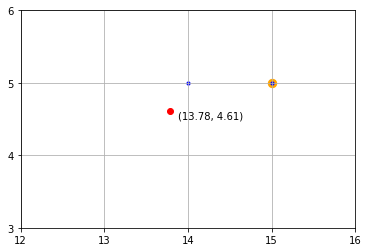

True


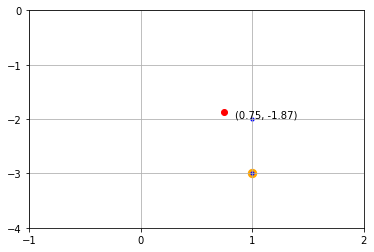

False


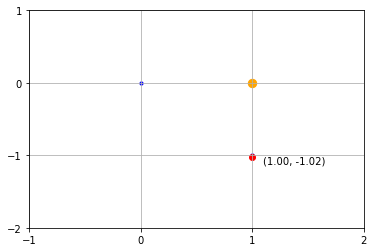

False


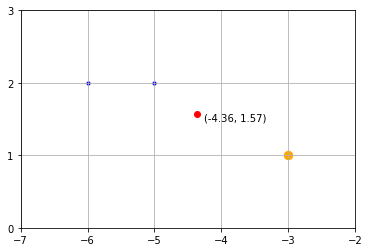

False


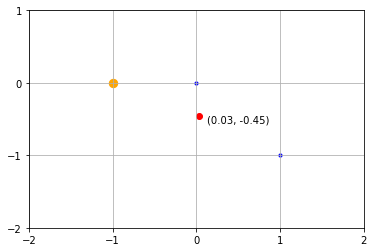

True


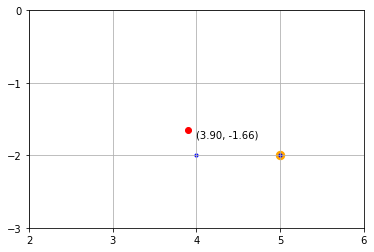

False


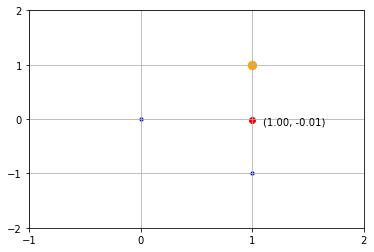

True


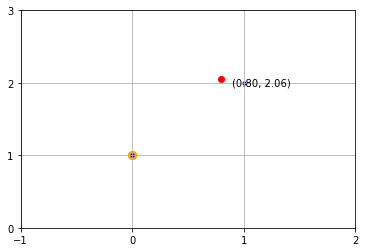

True


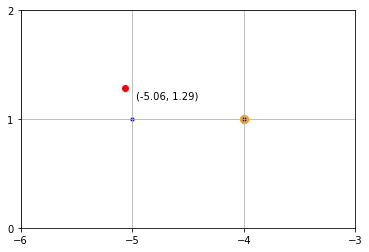

True


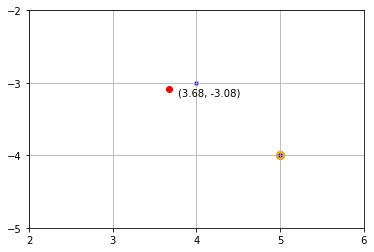

False


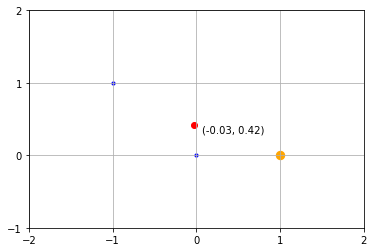

True


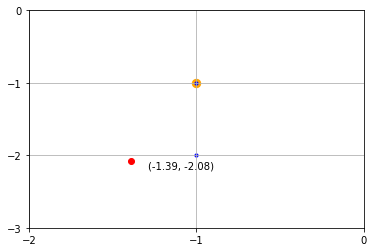

True


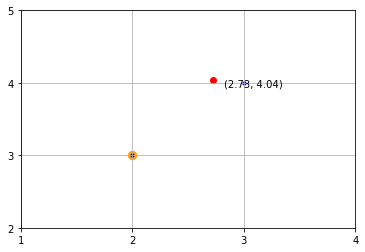

True


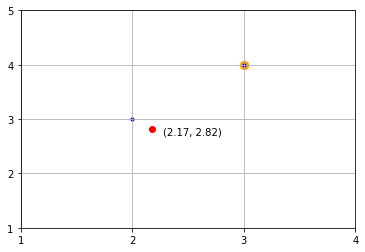

True


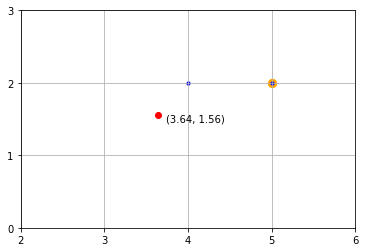

True


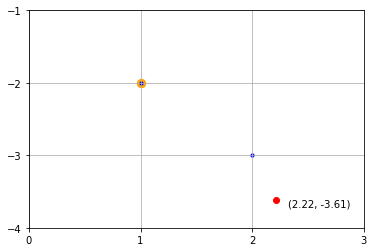

True


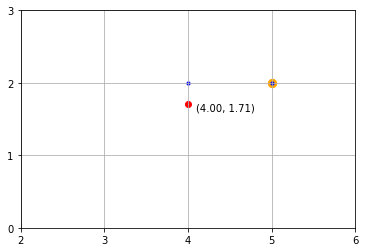

True


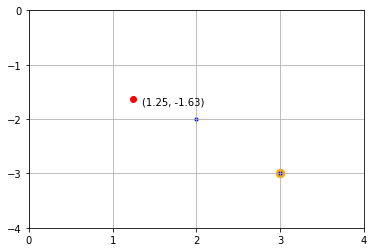

True


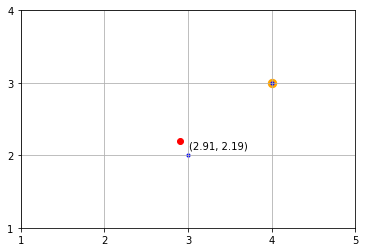

False


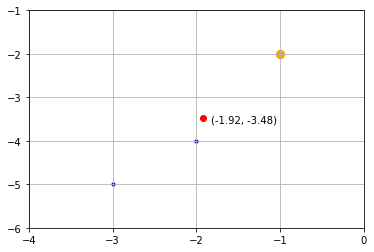

False


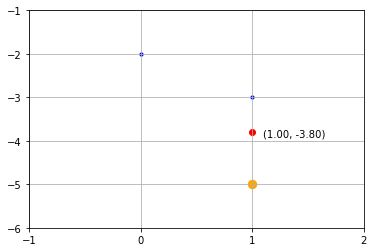

False


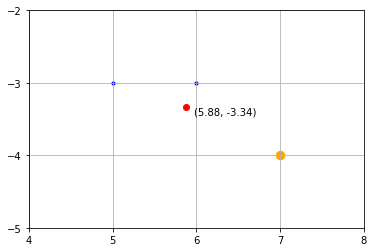

False


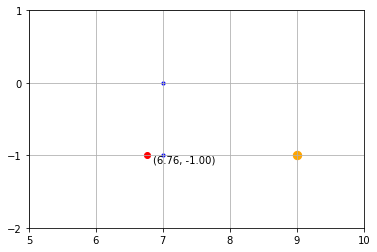

True


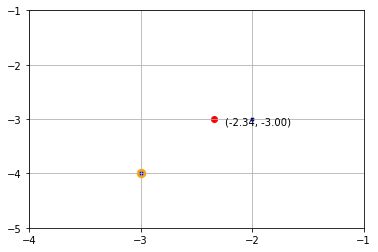

True


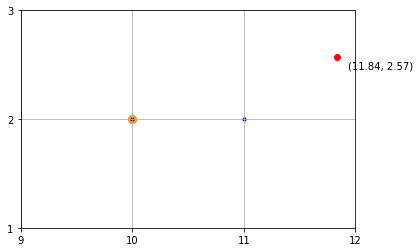

False


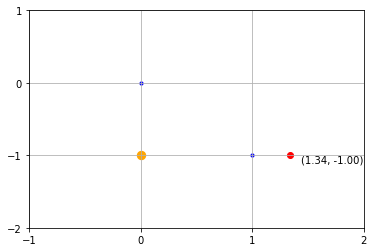

True


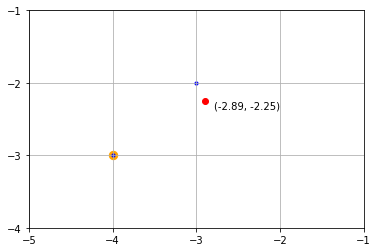

False


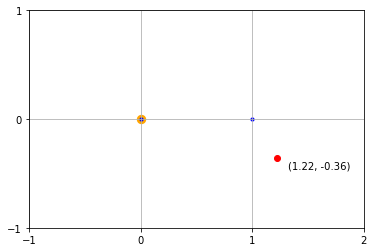

True


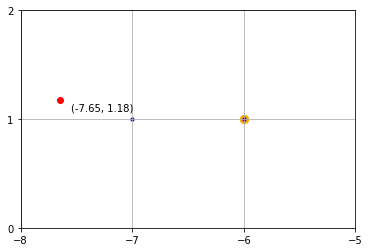

True


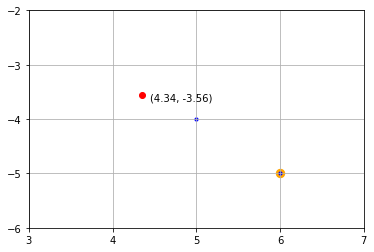

True


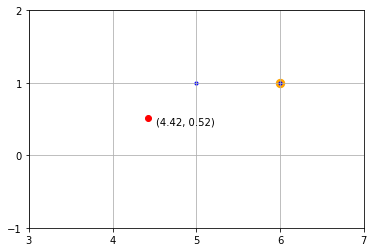

True


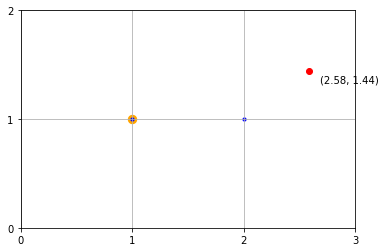

True


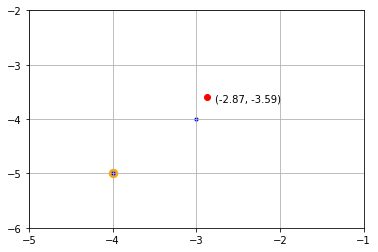

False


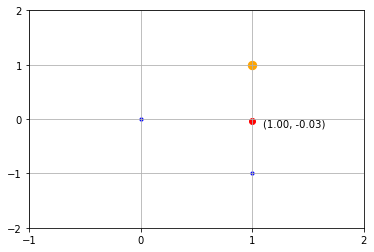

True


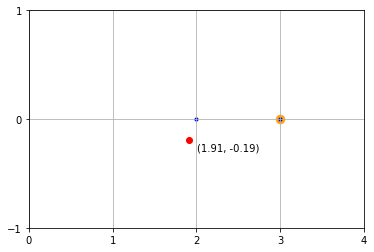

False


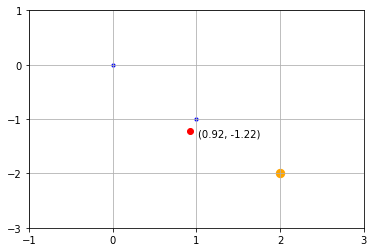

False


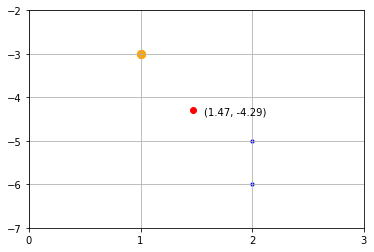

False


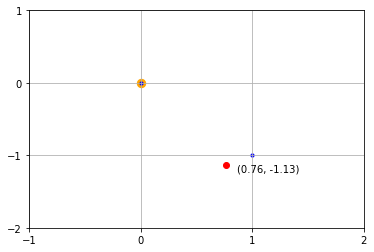

True


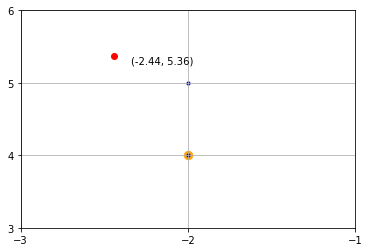

False


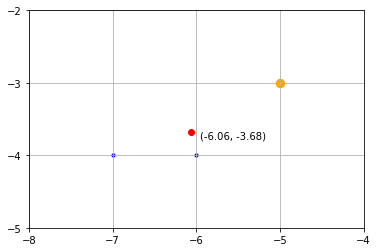

False


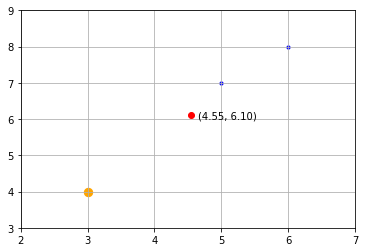

False


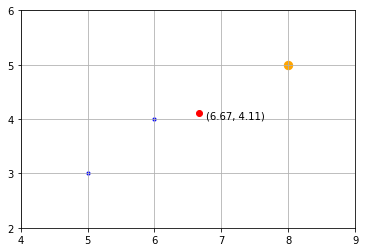

True


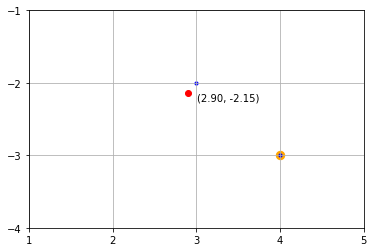

False


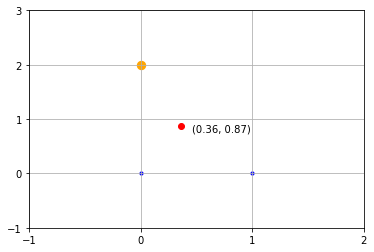

True


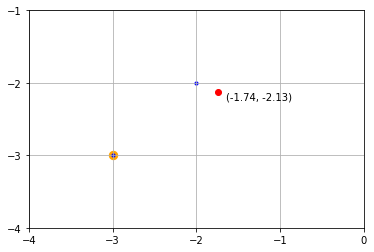

False


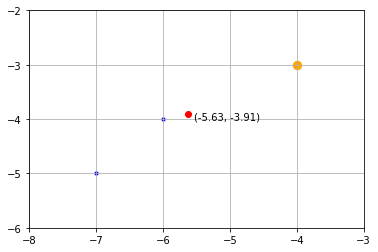

False


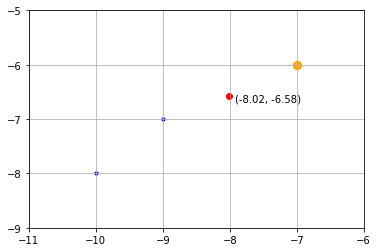

False


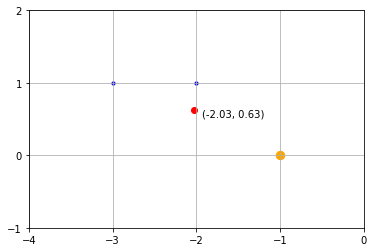

False


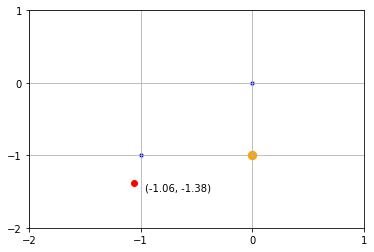

False


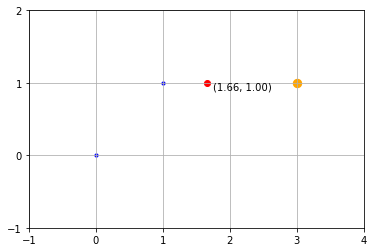

False


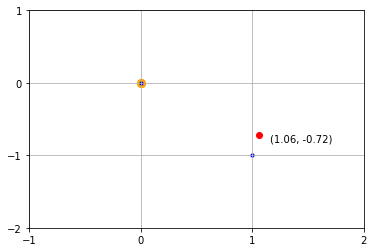

True


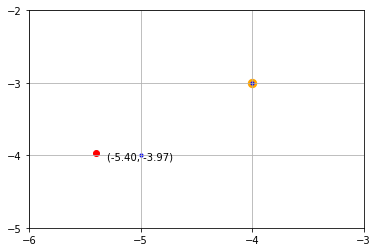

False


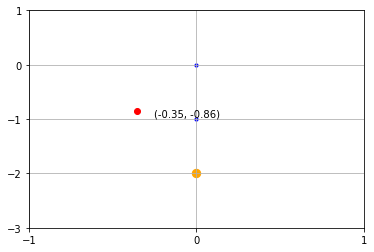

False


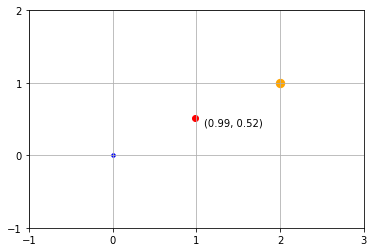

False


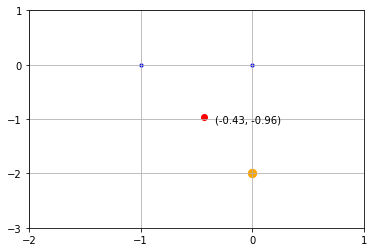

False


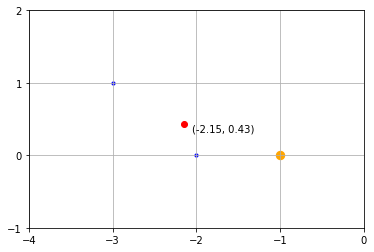

False


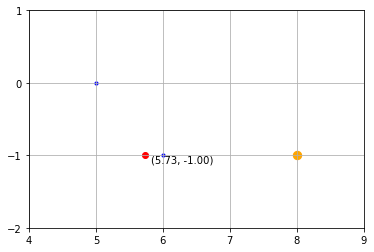

True


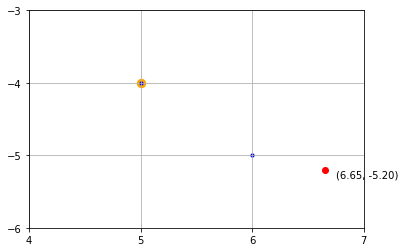

True


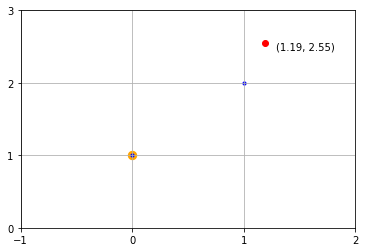

False


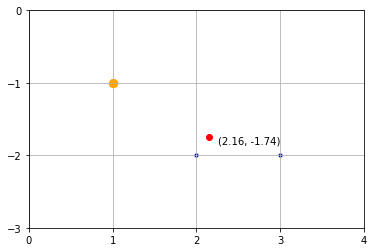

False


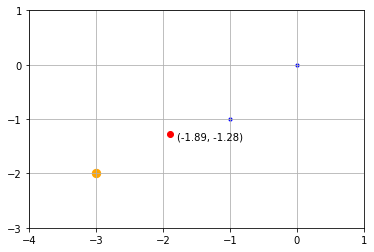

False


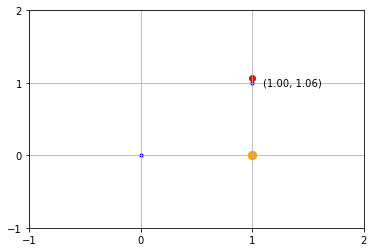

True


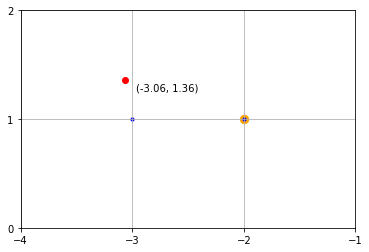

True


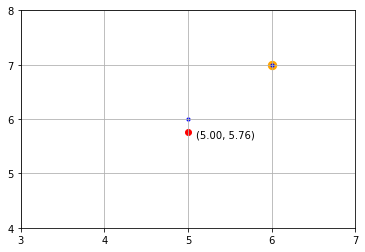

True


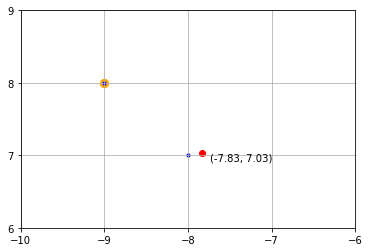

False


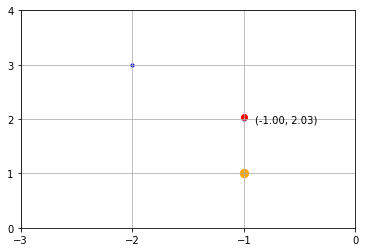

False


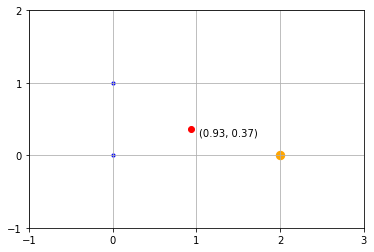

True


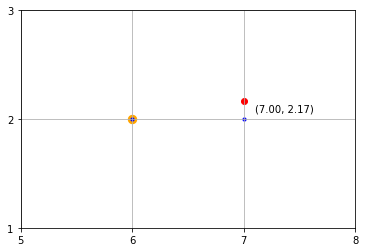

False


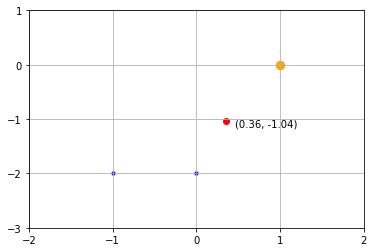

True


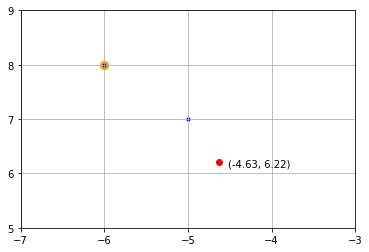

False


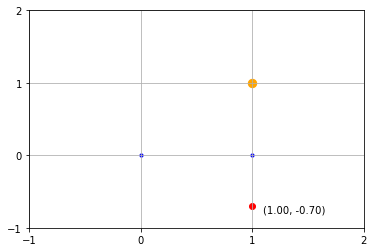

True


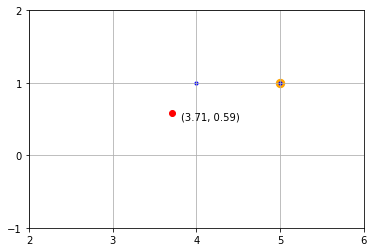

True


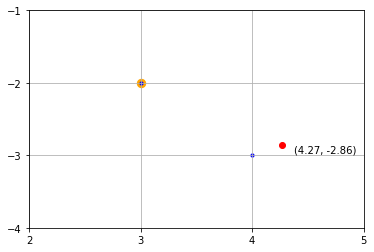

True


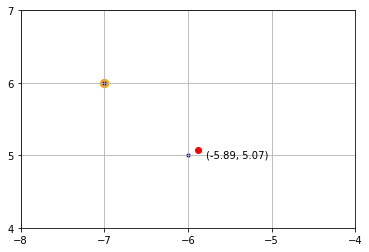

True


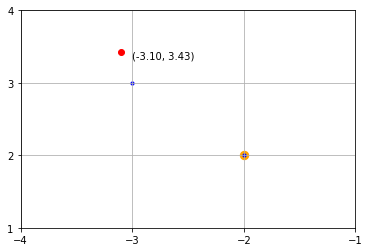

False


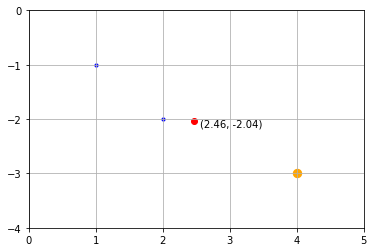

False


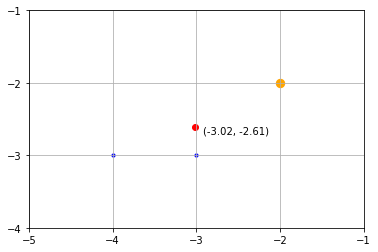

False


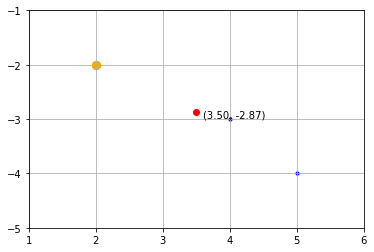

False


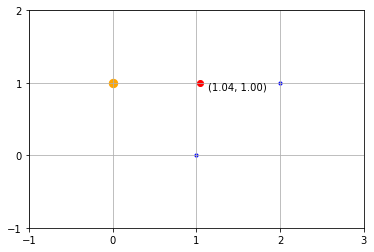

False


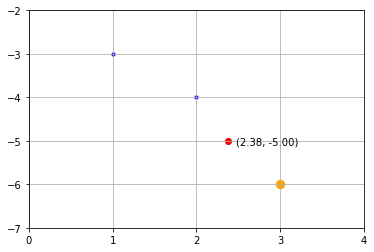

False


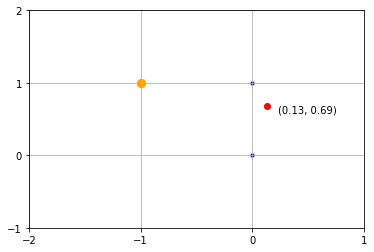

False


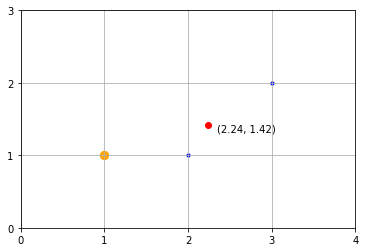

True


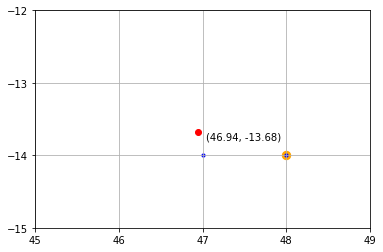

False


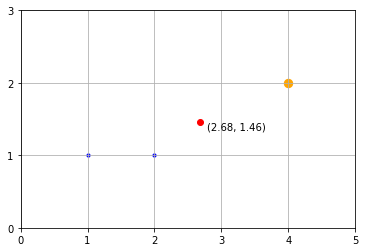

False


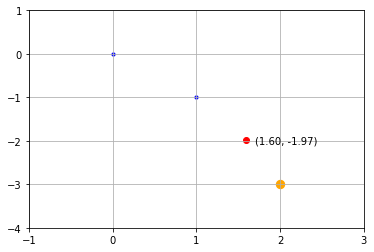

True


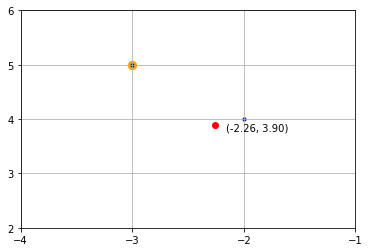

True


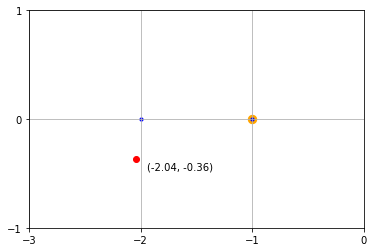

False


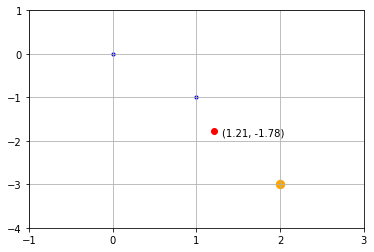

True


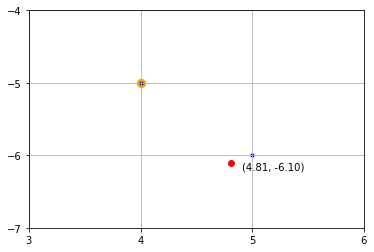

False


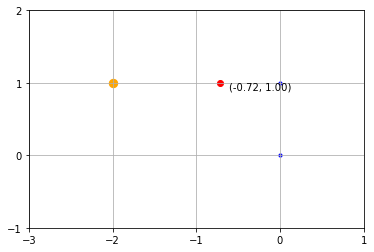

False


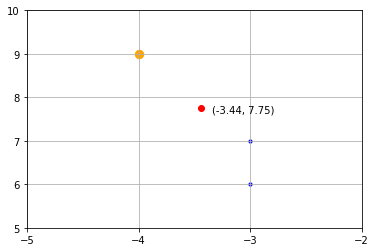

False


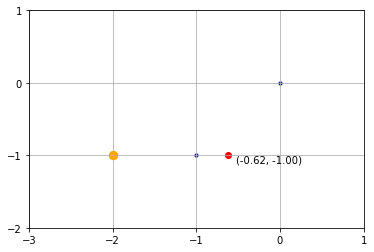

True


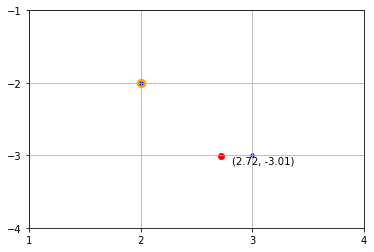

False


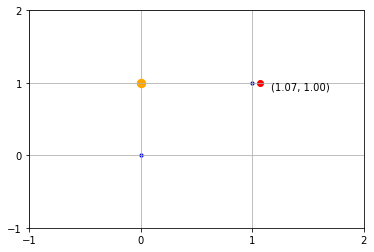

False


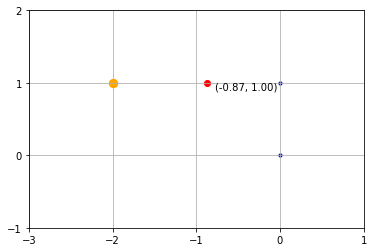

True


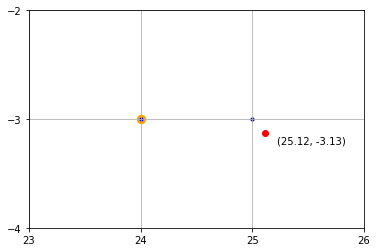

False


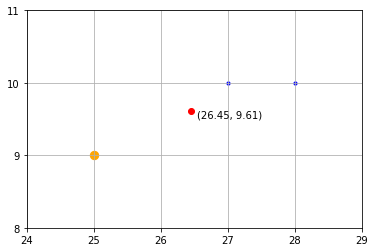

False


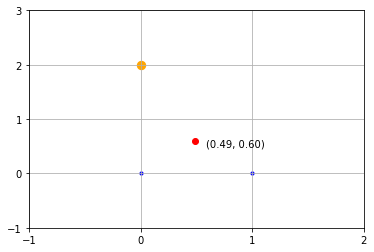

False


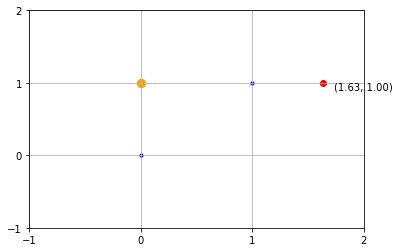

False


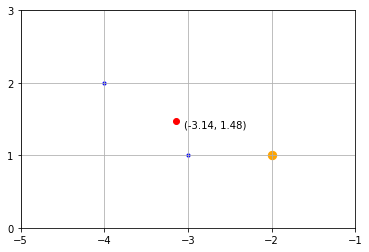

False


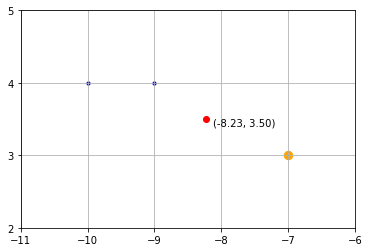

True


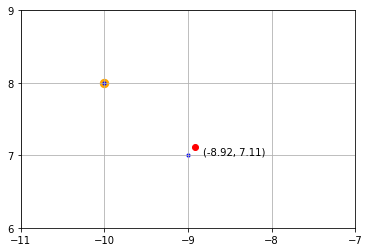

False


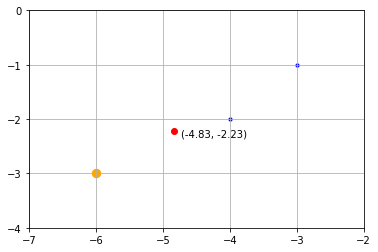

False


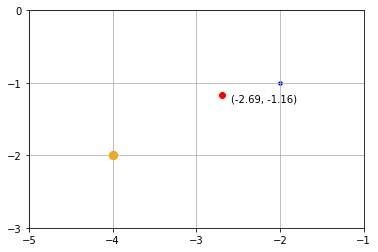

False


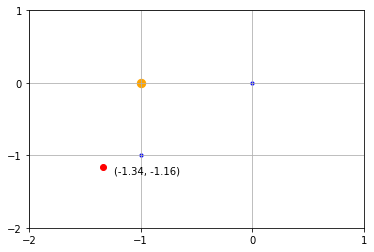

False


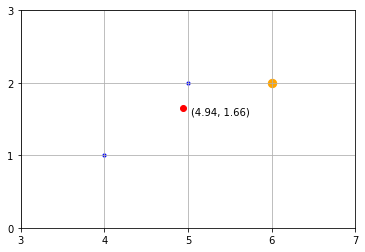

True


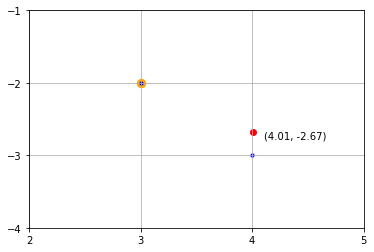

True


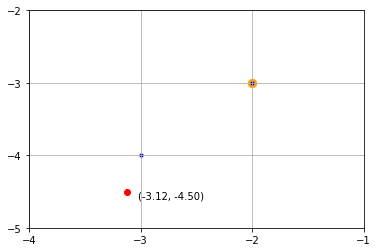

True


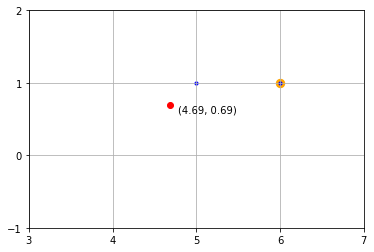

True


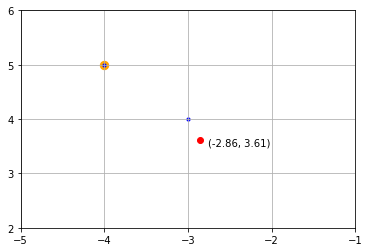

False


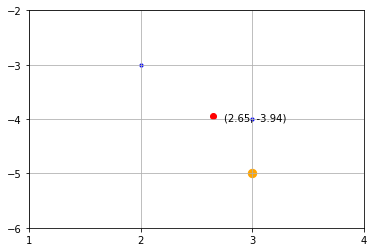

False


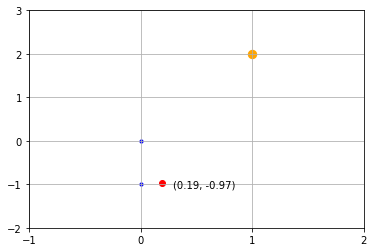

True


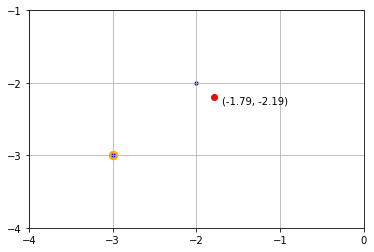

False


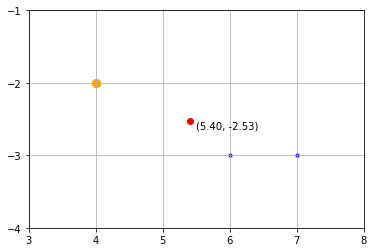

True


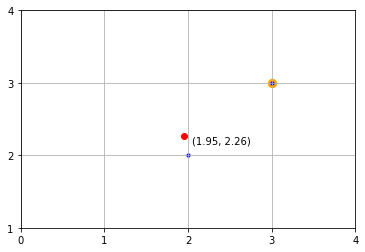

False


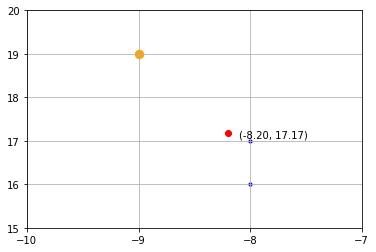

False


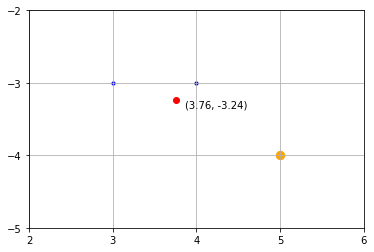

False


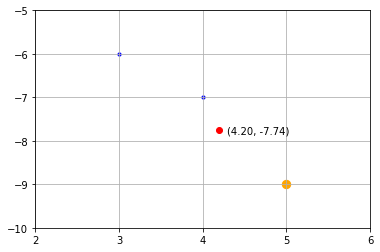

False


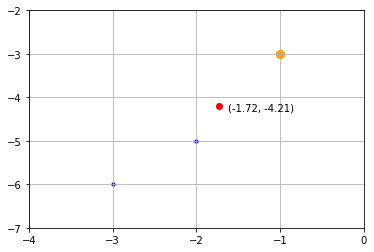

False


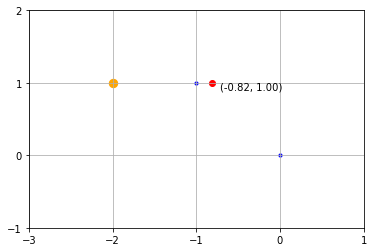

False


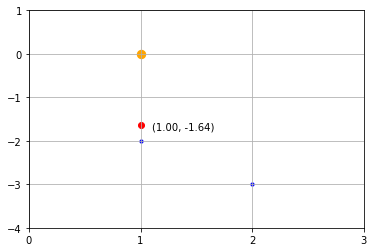

False


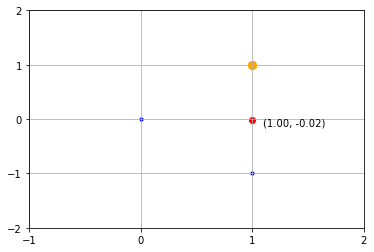

True


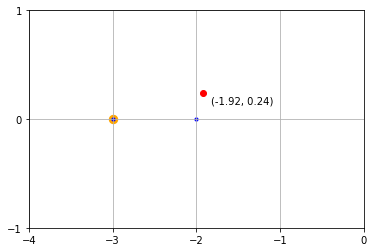

False


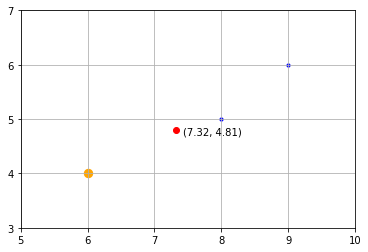

False


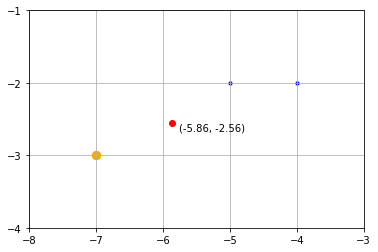

False


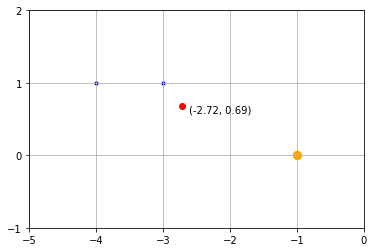

False


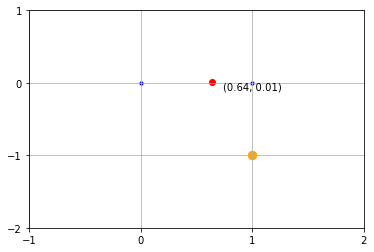

False


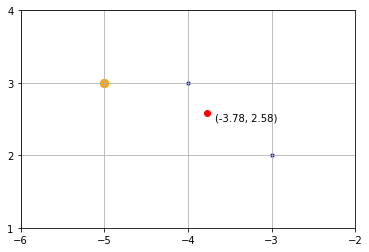

True


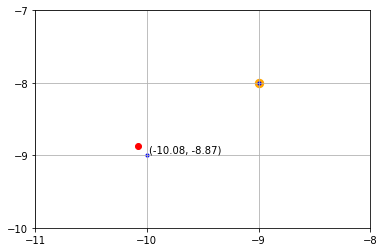

False


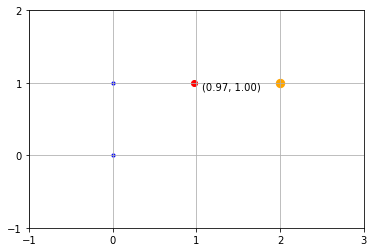

False


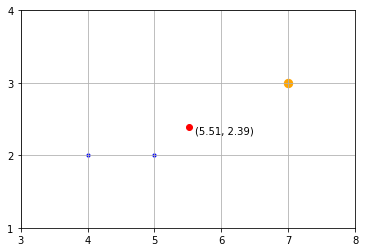

False


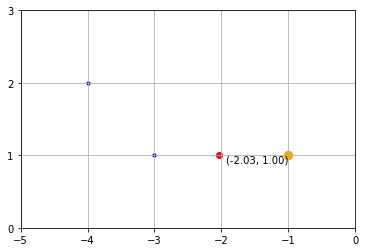

False


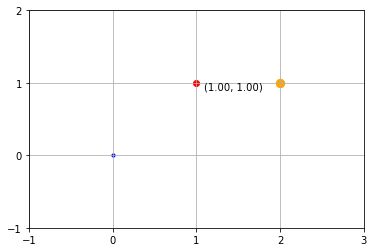

False


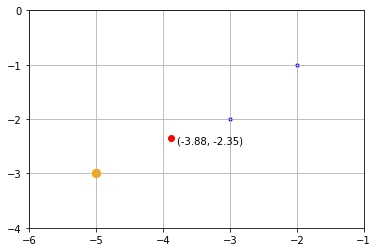

True


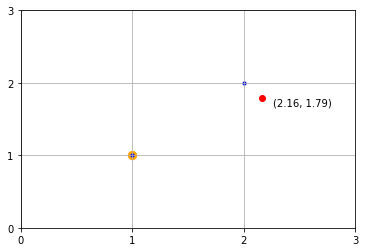

False


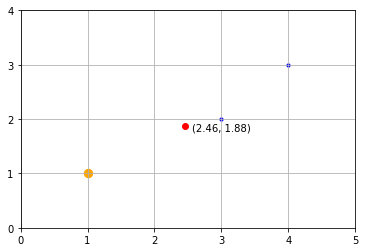

True


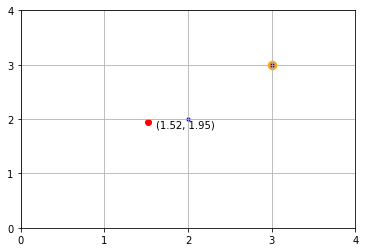

True


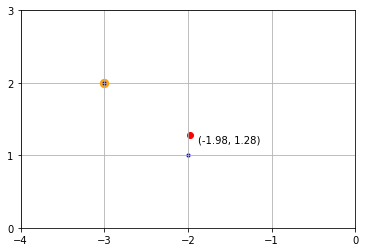

False


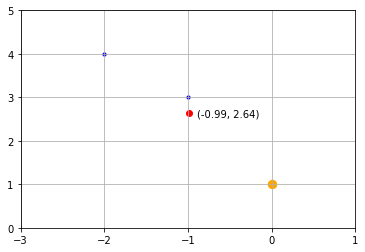

False


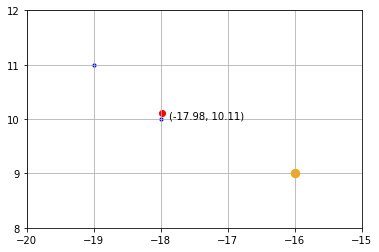

False


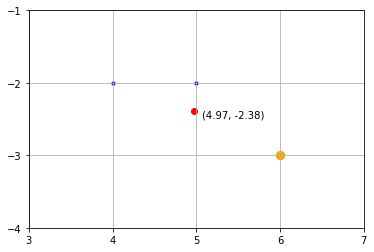

False


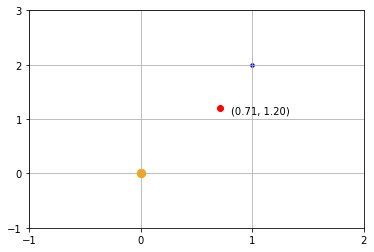

True


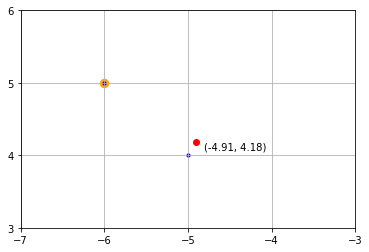

False


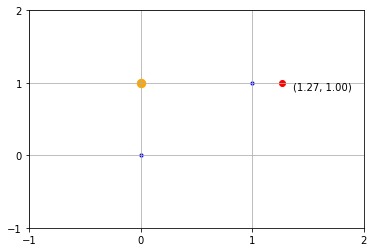

True


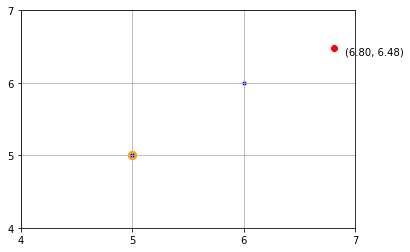

False


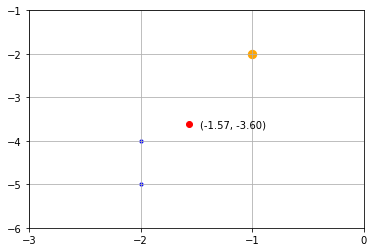

True


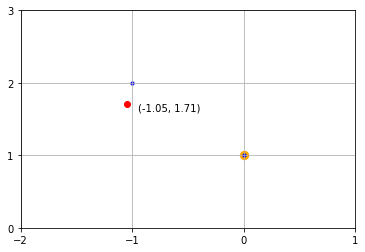

True


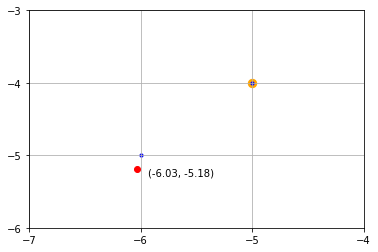

True


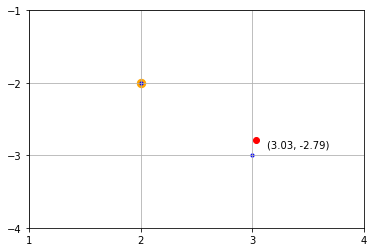

False


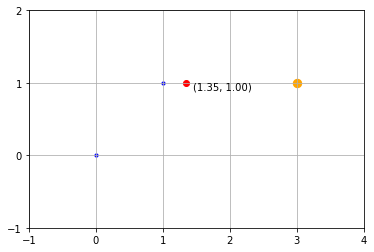

True


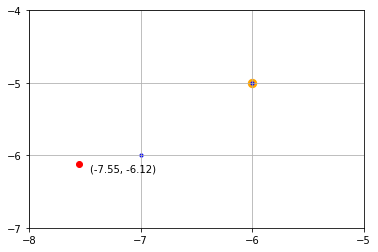

False


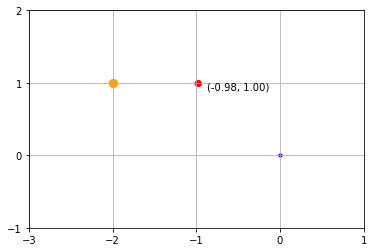

True


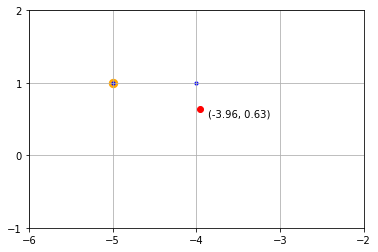

False


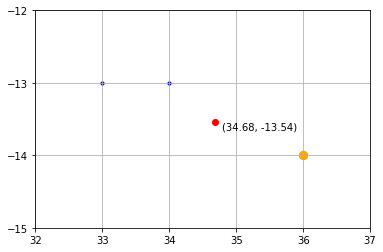

True


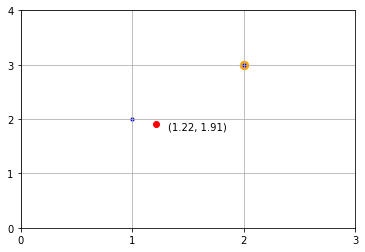

True


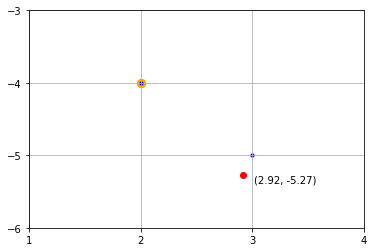

False


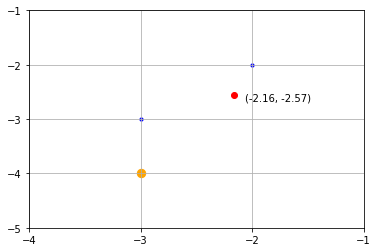

True


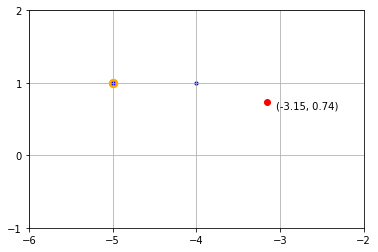

True


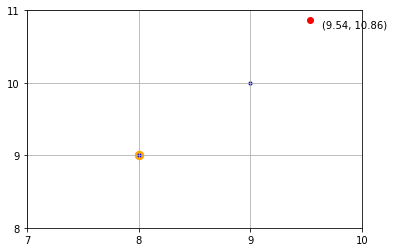

True


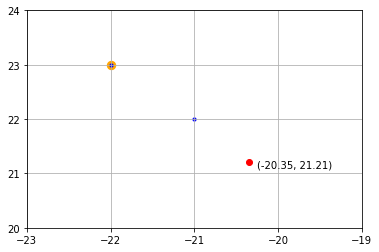

False


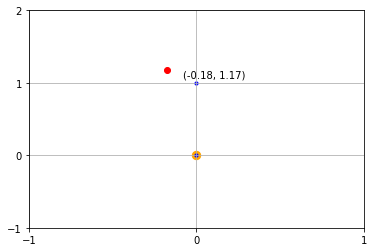

True


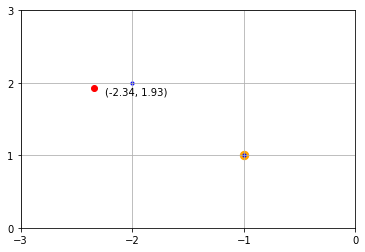

False


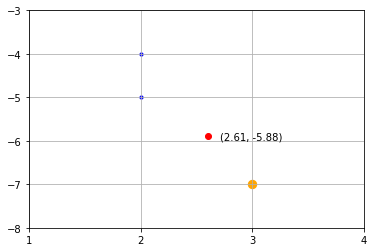

False


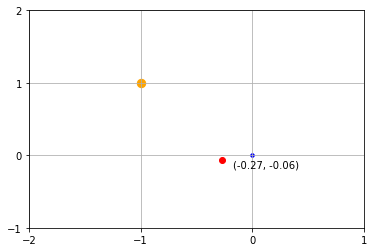

True


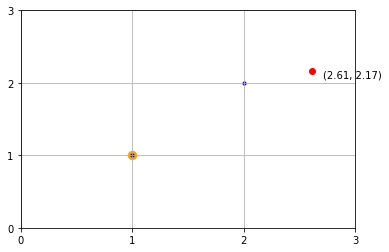

False


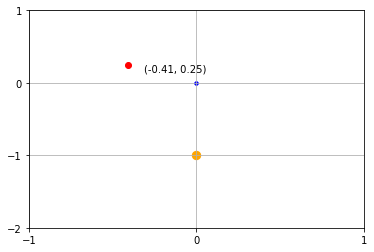

True


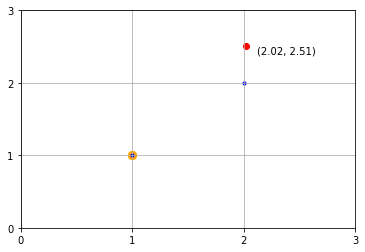

False


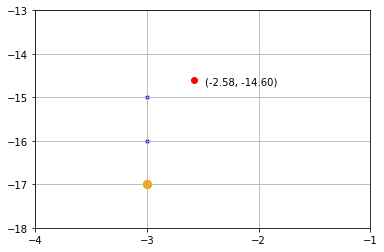

False


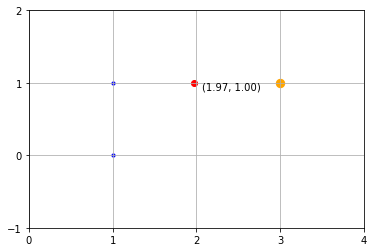

False


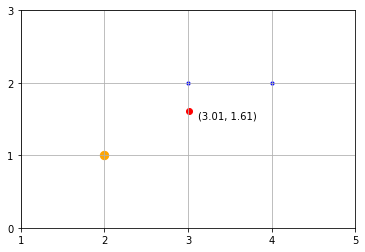

True


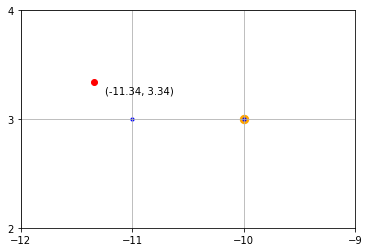

True


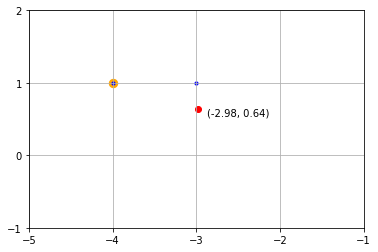

True


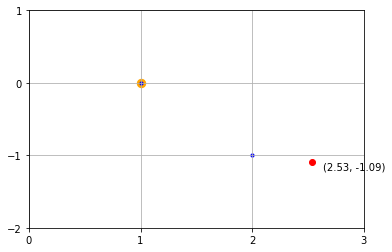

False


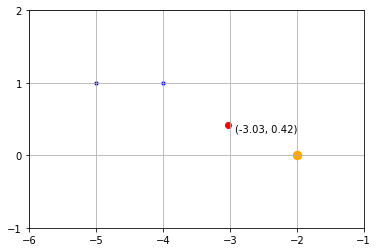

True


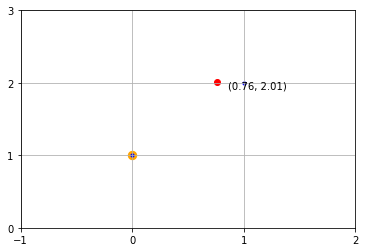

False


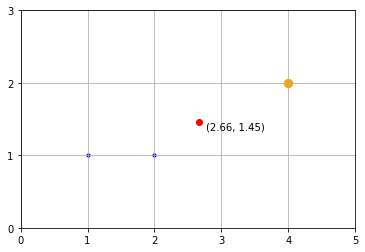

False


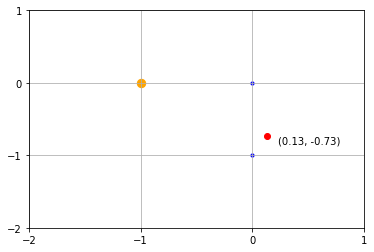

False


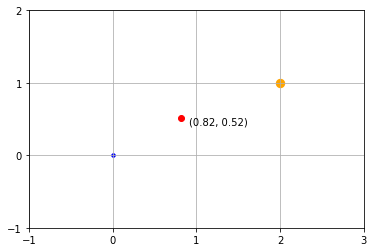

True


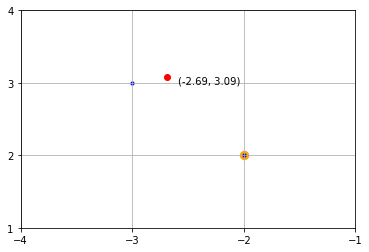

True


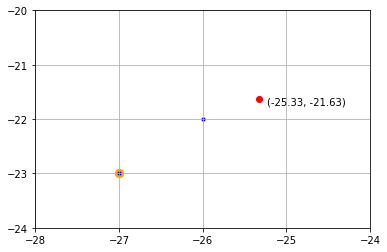

True


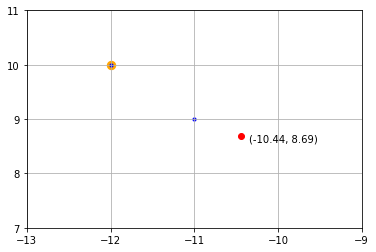

True


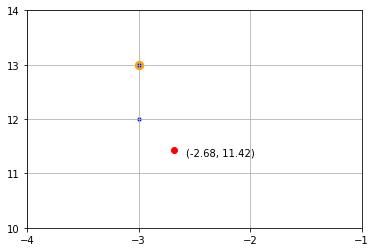

True


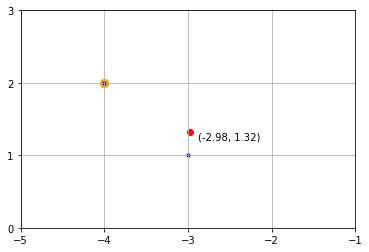

False


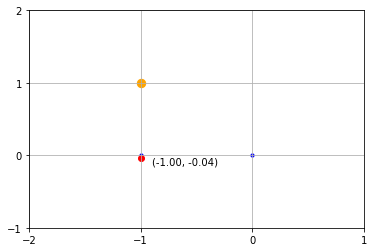

False


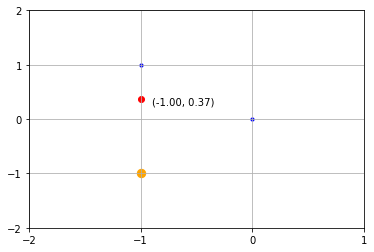

False


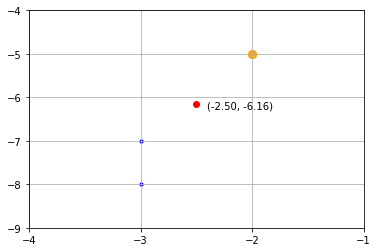

False


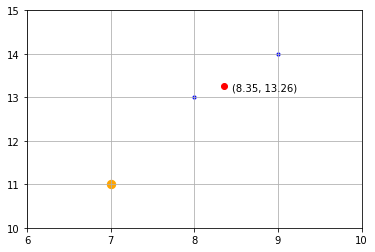

True


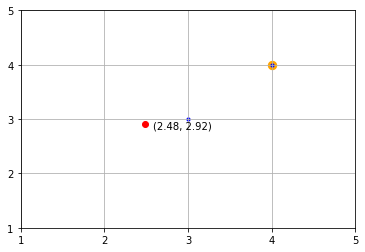

True


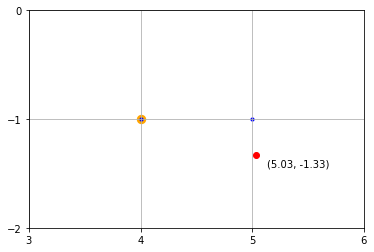

False


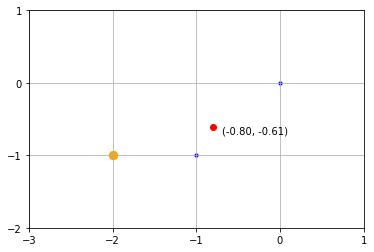

True


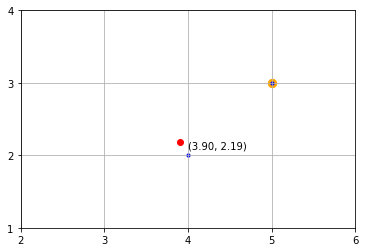

True


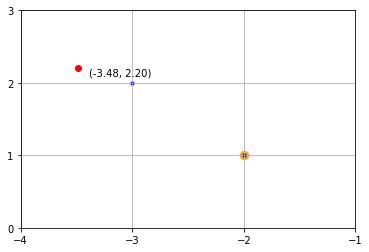

False


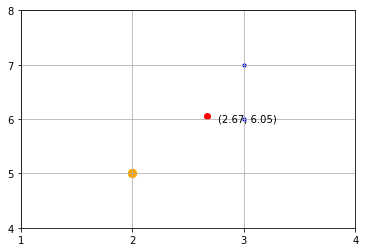

True


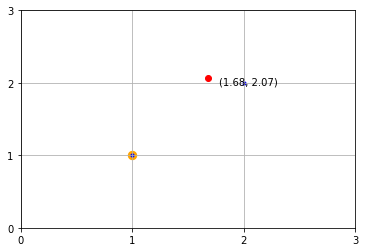

False


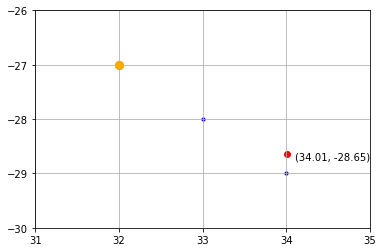

False


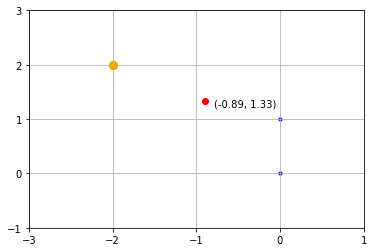

True


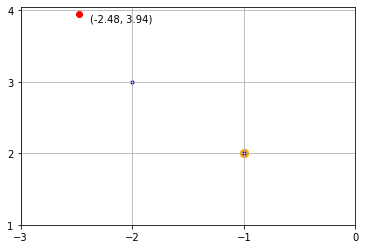

False


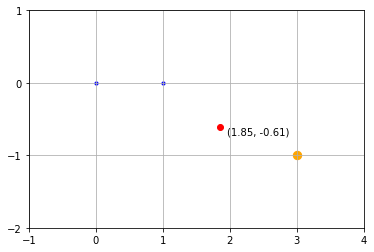

False


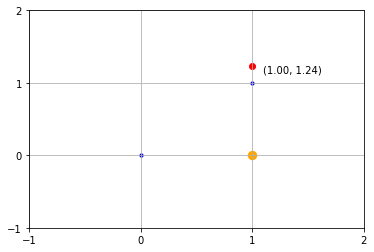

False


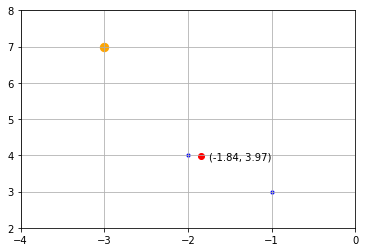

True


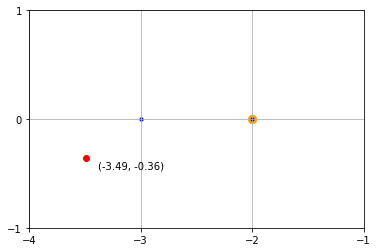

True


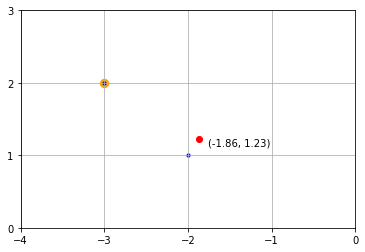

False


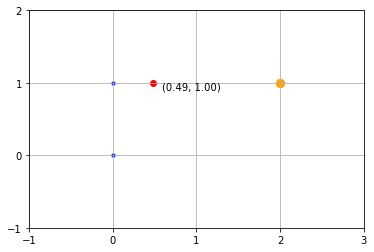

False


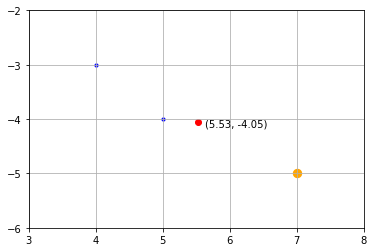

False


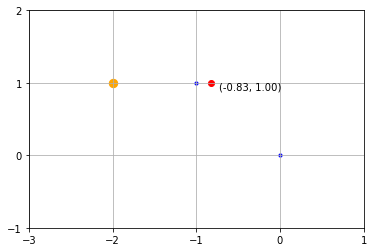

True


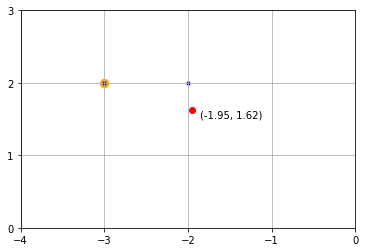

True


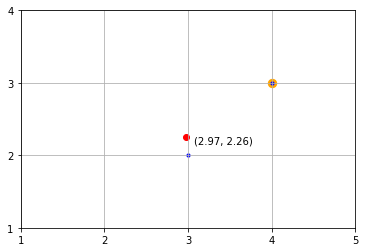

False


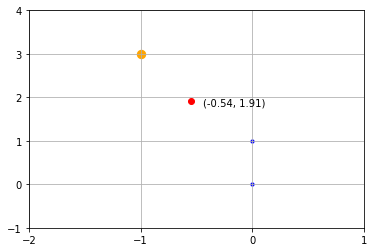

False


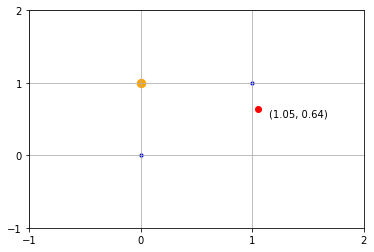

True


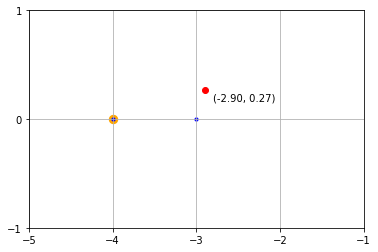

False


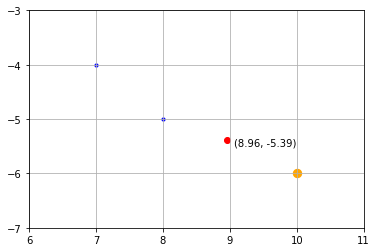

True


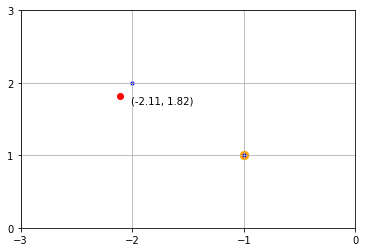

True


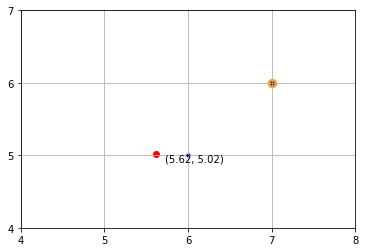

False


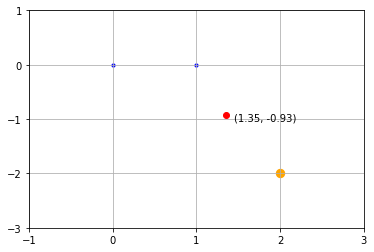

False


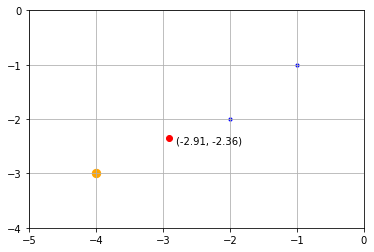

False


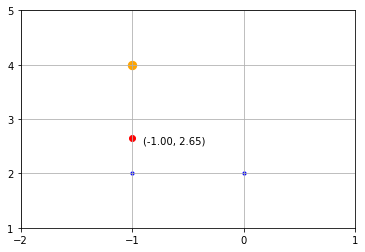

False


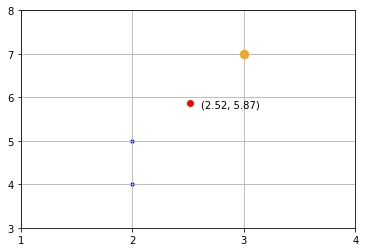

True


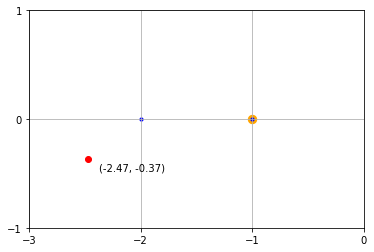

False


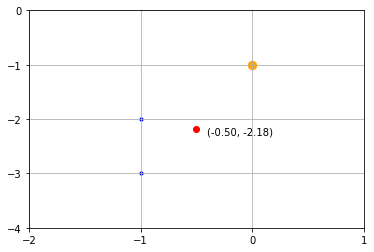

False


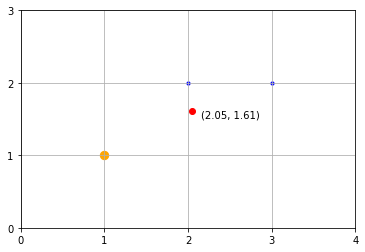

True


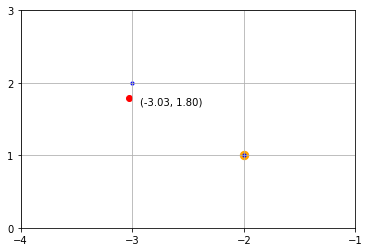

False


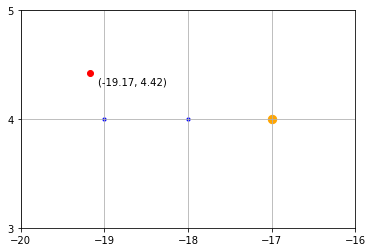

False


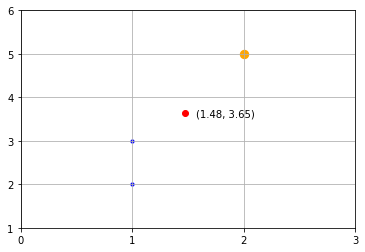

True


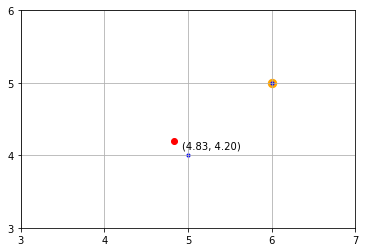

True


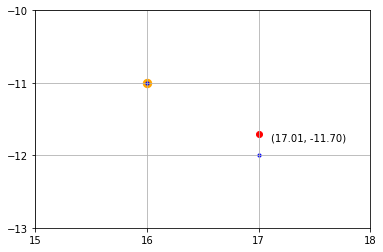

True


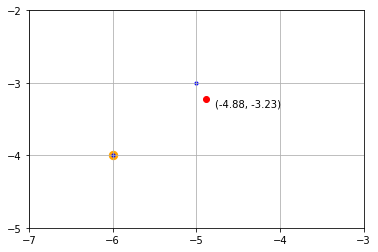

True


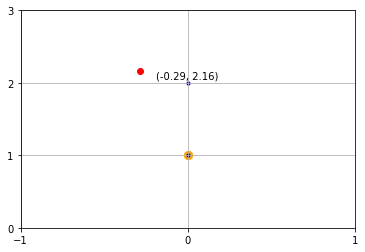

True


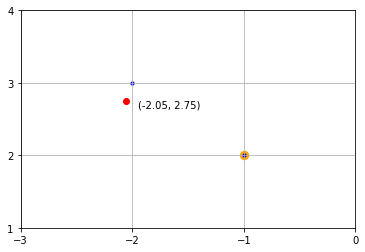

False


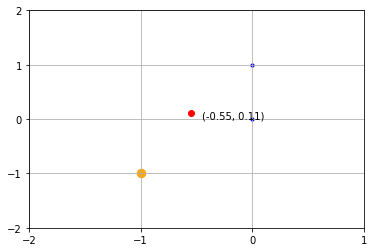

False


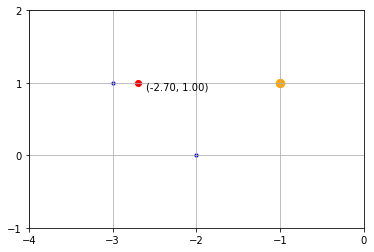

True


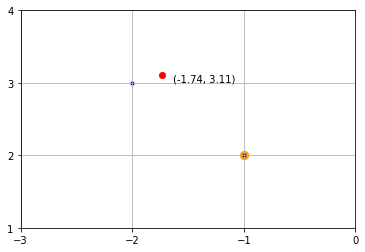

False


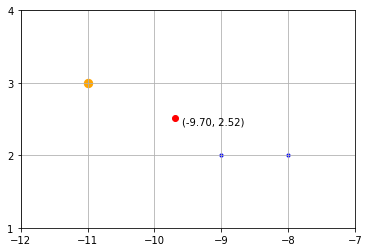

True


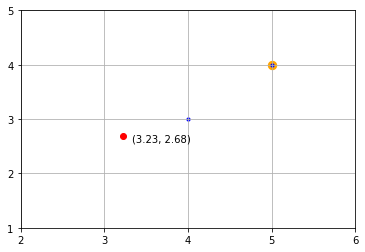

False


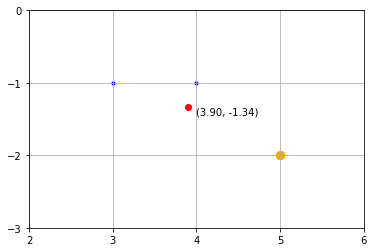

False


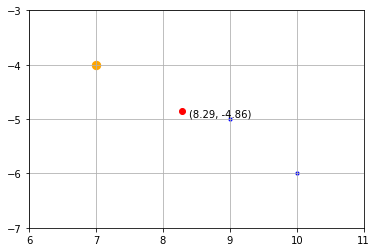

False


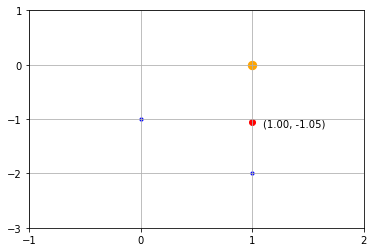

True


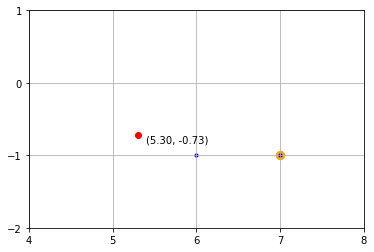

False


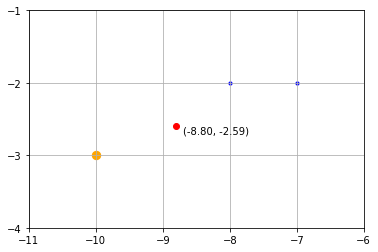

True


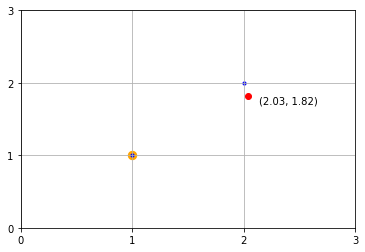

False


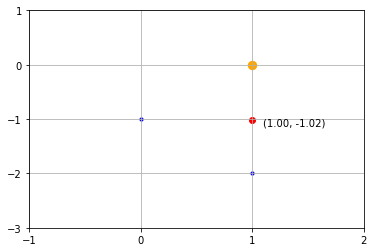

False


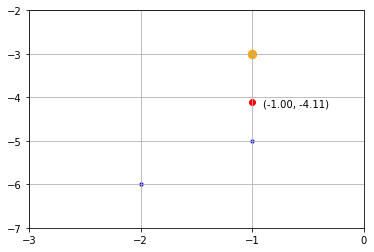

False


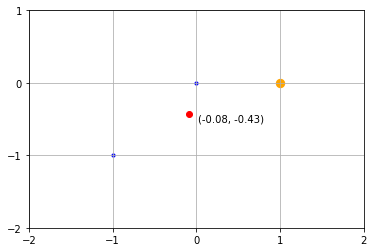

True


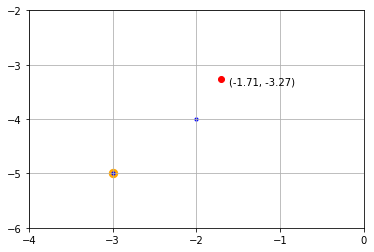

False


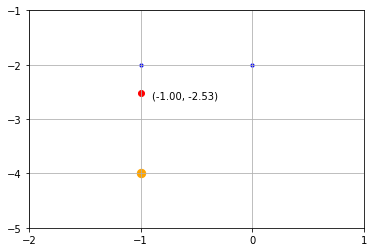

False


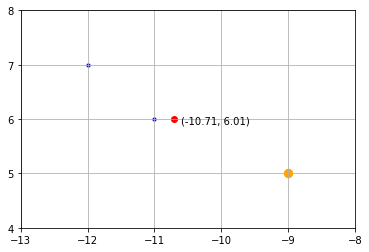

False


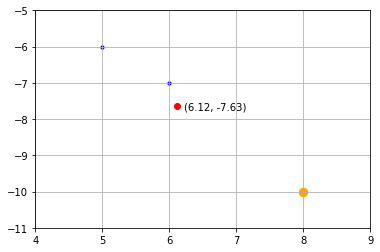

False


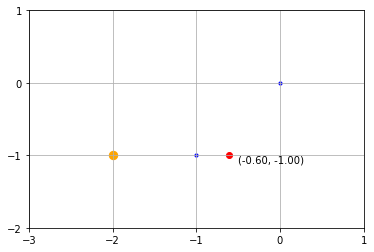

True


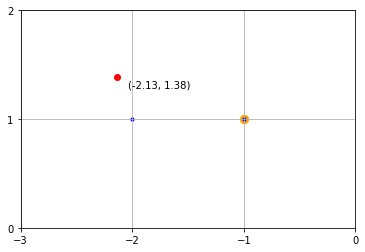

True


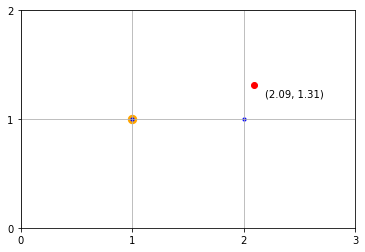

False


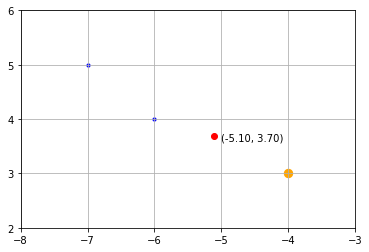

False


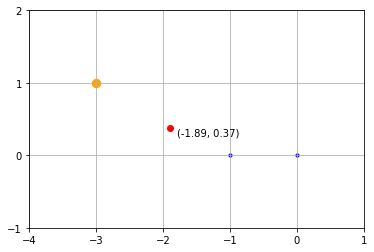

False


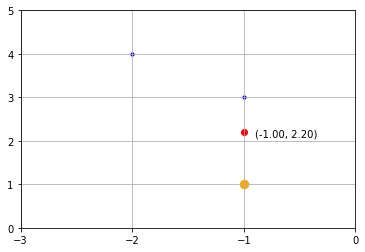

False


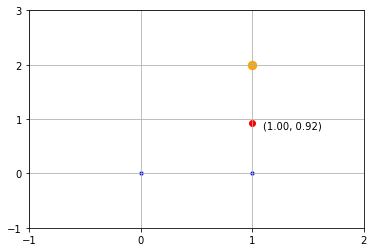

False


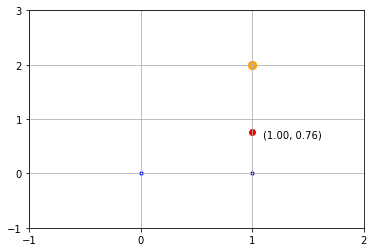

False


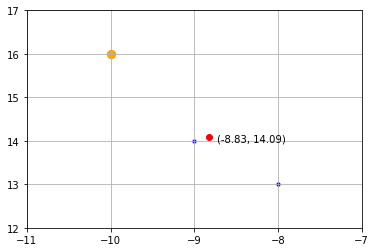

True


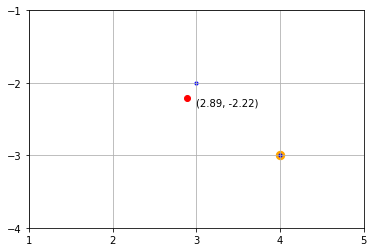

False


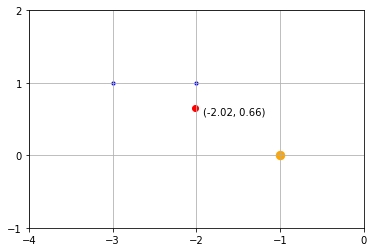

False


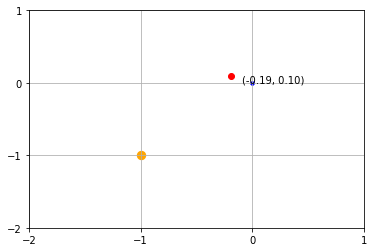

True


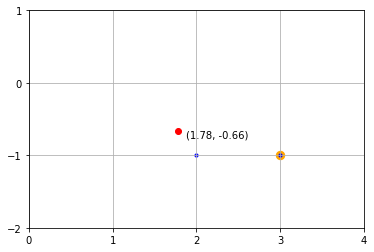

False


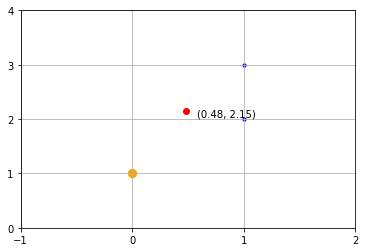

False


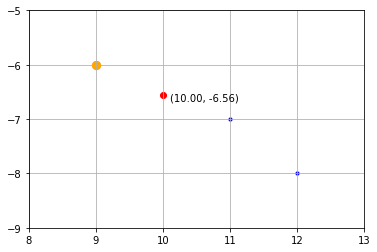

False


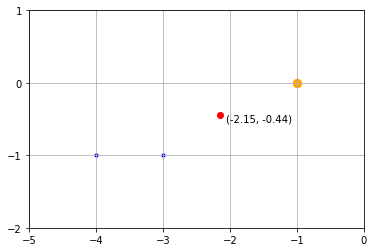

True


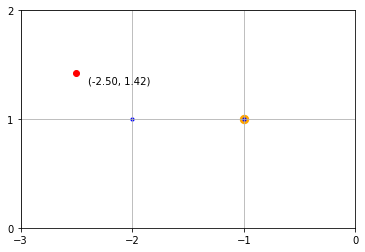

True


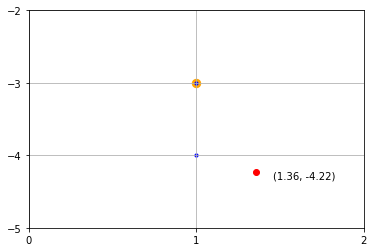

True


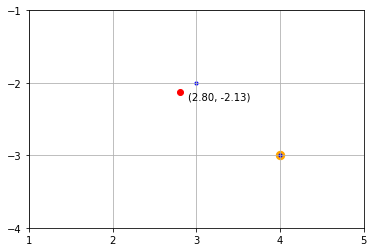

False


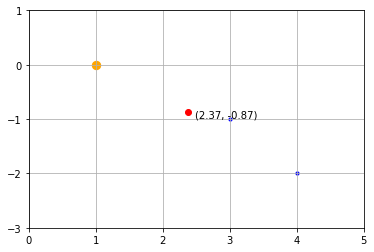

True


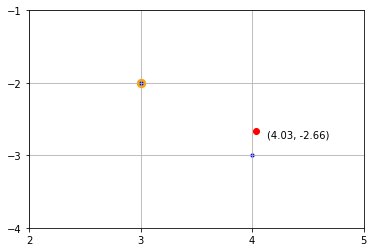

False


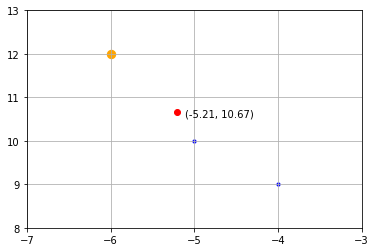

False


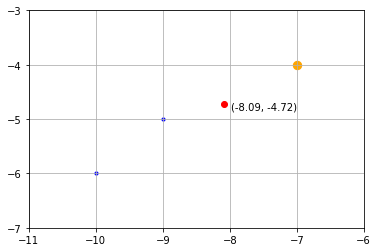

False


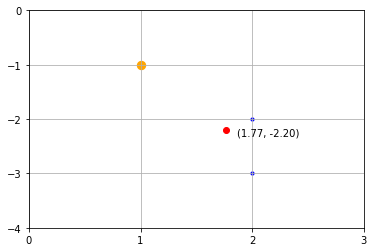

False


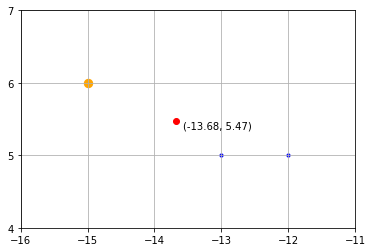

False


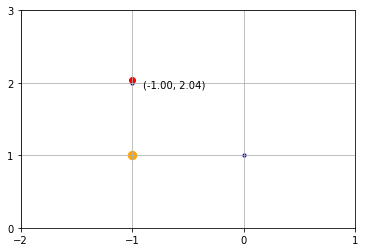

False


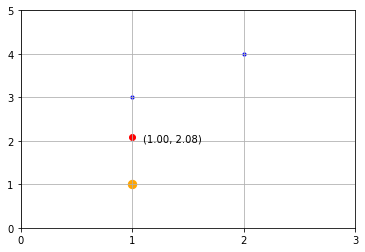

True


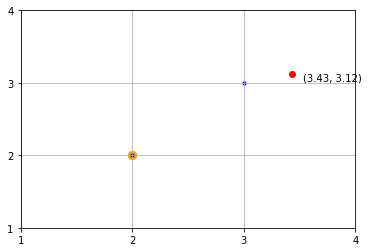

False


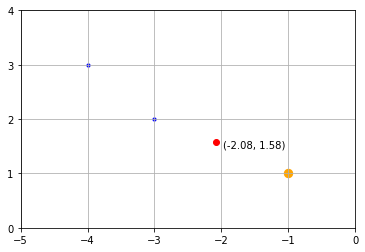

True


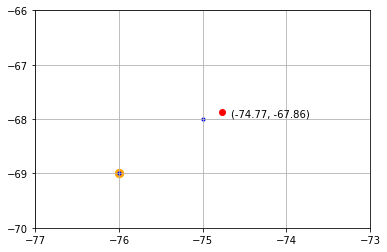

True


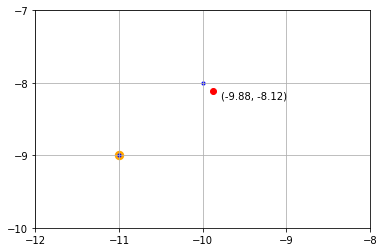

False


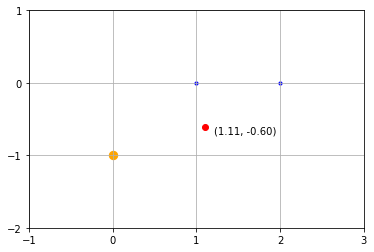

False


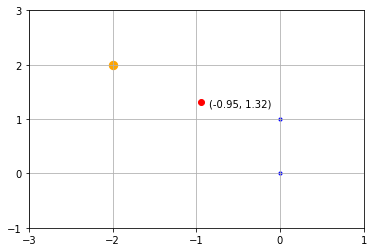

True


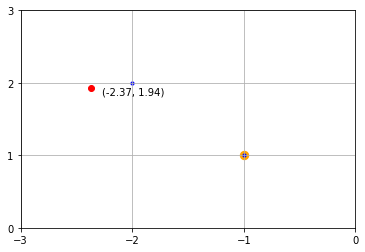

False


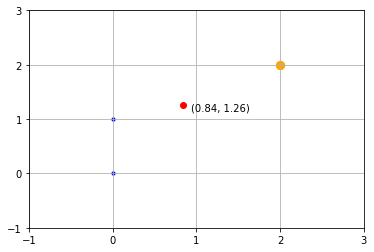

False


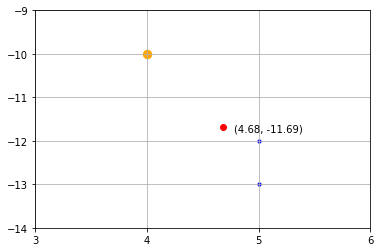

False


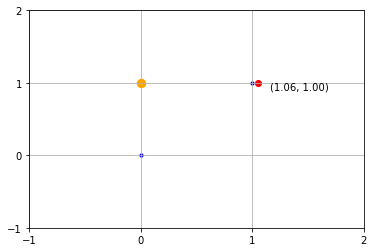

True


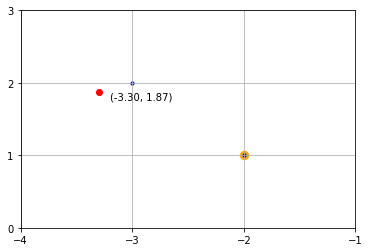

True


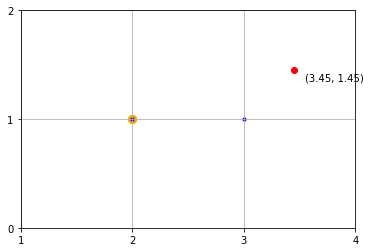

True


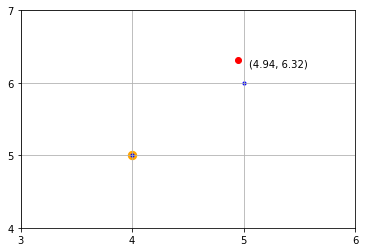

True


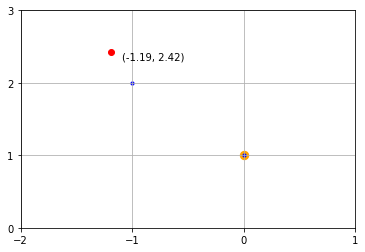

False


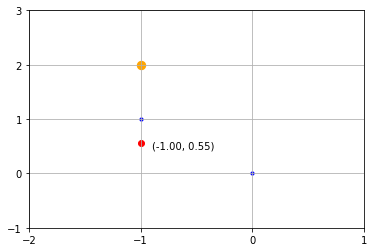

False


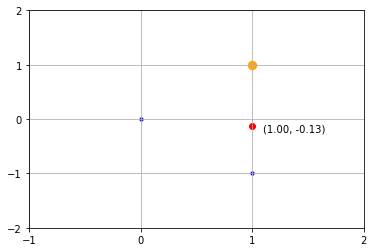

False


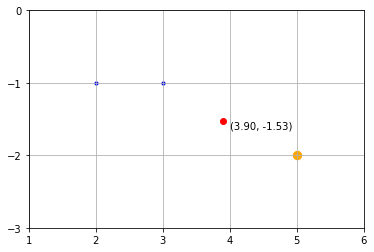

False


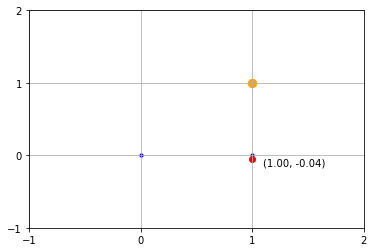

True


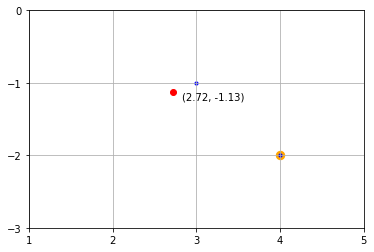

False


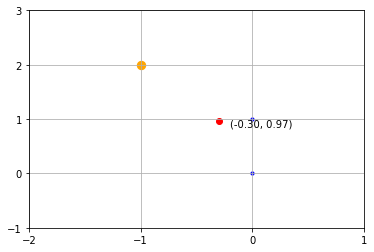

False


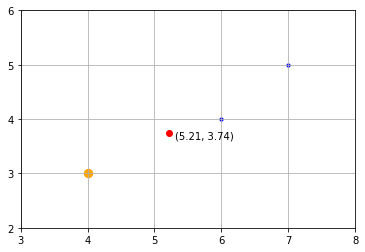

False


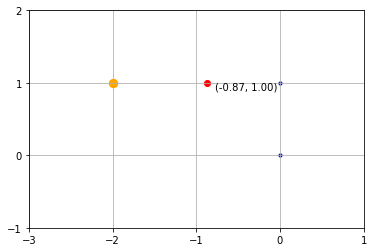

False


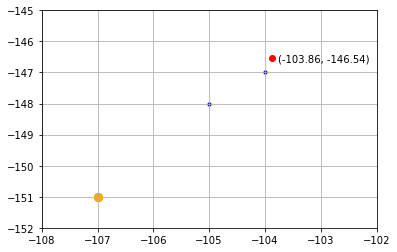

True


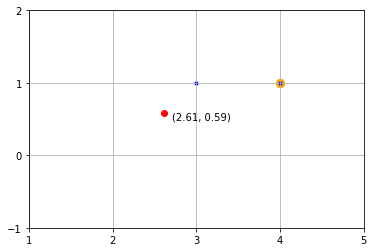

True


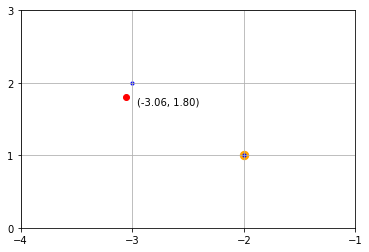

False


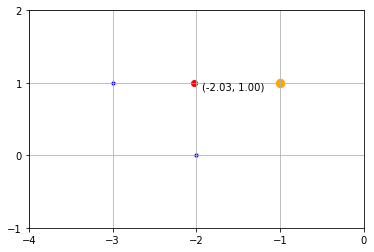

False


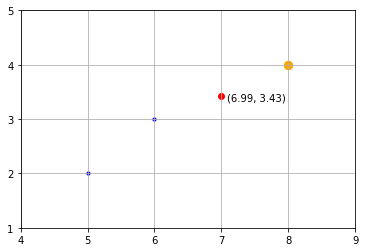

True


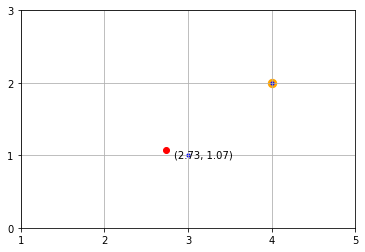

False


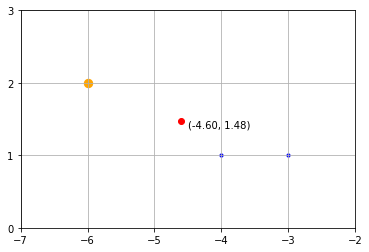

True


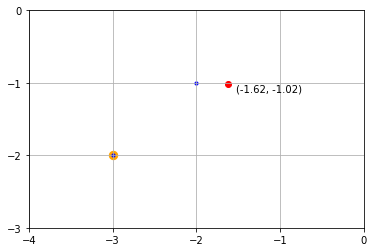

False


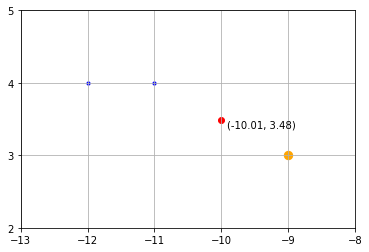

False


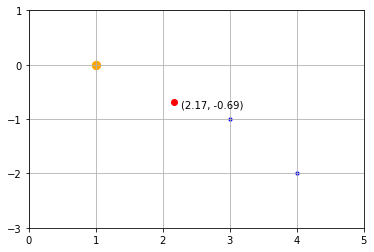

True


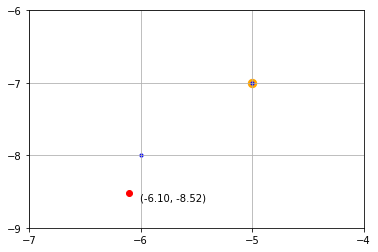

False


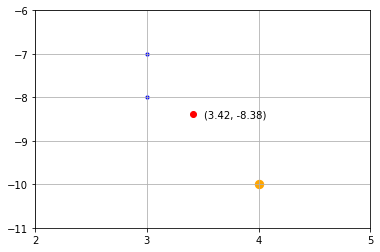

True


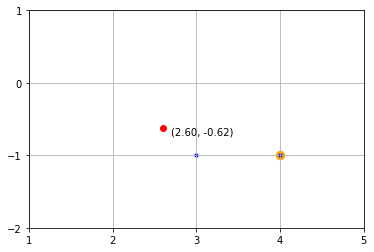

False


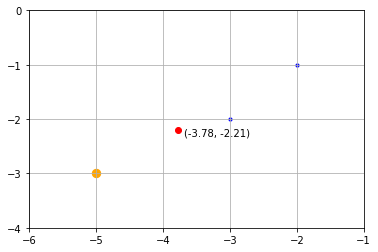

True


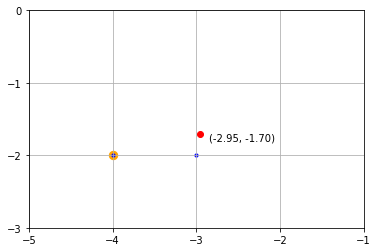

True


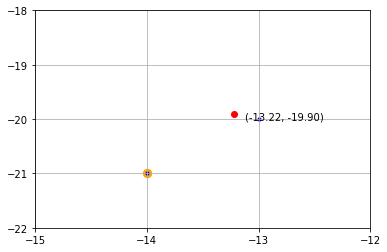

True


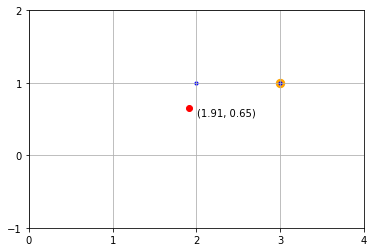

False


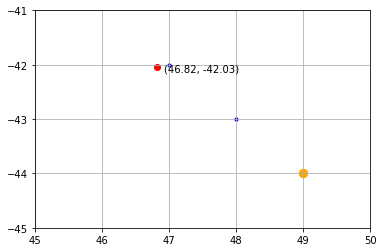

True


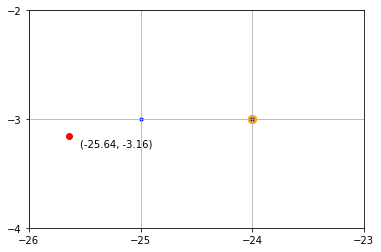

True


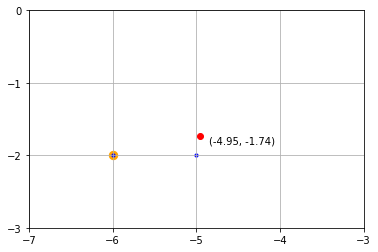

False


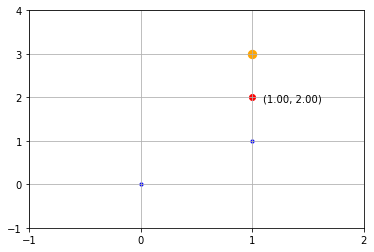

False


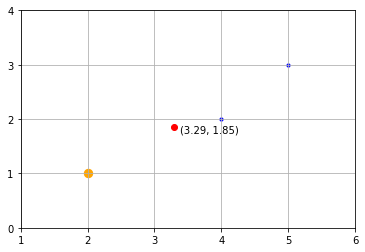

False


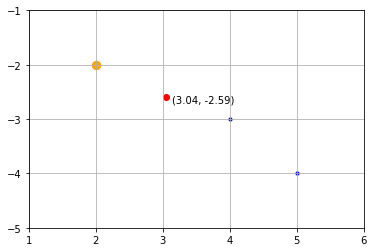

False


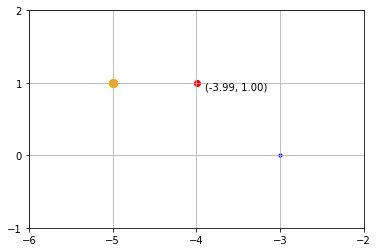

True


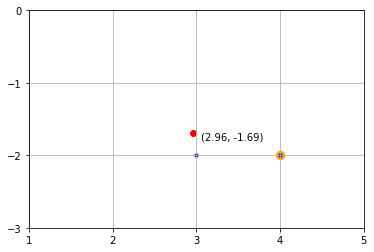

False


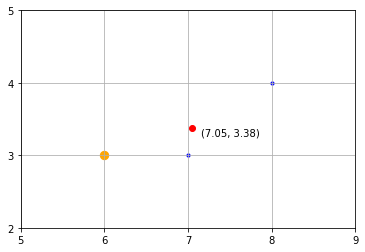

True


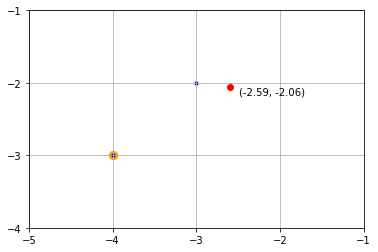

True


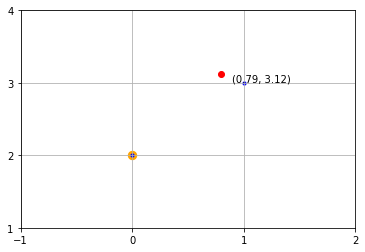

True


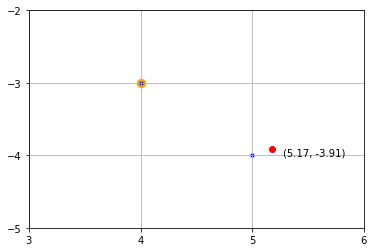

False


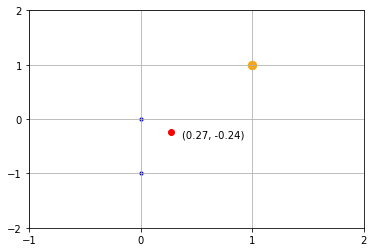

False


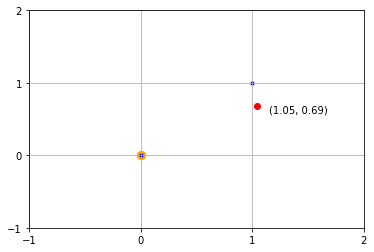

False


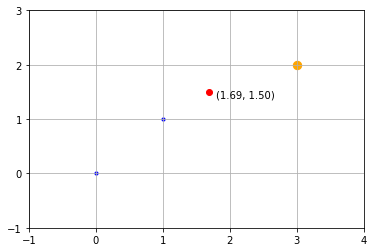

False


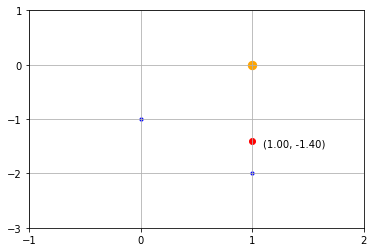

False


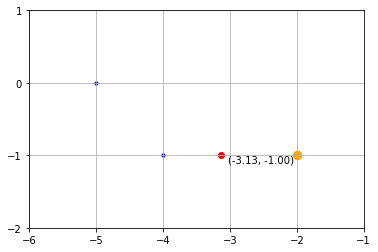

True


KeyboardInterrupt: 

In [37]:
# This part of code is meant to generate the precise points the algorithm took during the descent. 

reached, pathways = descent("matrices3x3-600instances.json")


import matplotlib.pyplot as plt

def different_components(pathway):
    diff_indices = set(range(len(pathway[0])))
    
    for i in range(len(pathway[0])):
        unique_values = {point[i] for point in pathway}
        if len(unique_values) == 1:
            diff_indices.remove(i)
            break

    return list(diff_indices)

def plot_pathway(pathway, result):
    '''
    Plots the pathway of the descent algorithm in following manner:

    red dot - lcCube
    blue small dots - pathway of the descent
    blue big dot - end of the descent, if not seen the descent ended successfully
    orange big dot - lcLLL
    '''
    diff_indices = different_components(pathway)

    x = [point[diff_indices[0]] for point in pathway]
    y = [point[diff_indices[1]] for point in pathway]
    
    # Create the plot
    plt.scatter(x[-1], y[-1], color='orange',s=70)  # Highlight the last point lcLLL in green
    plt.scatter(x[1:-1], y[1:-1], color='blue',s=10)
    plt.scatter(x[0], y[0], color='red')  # Highlight the first point lcCUBE in red

    # Add description next to the red point
    description = f"({x[0]:.2f}, {y[0]:.2f})"
    plt.text(x[0] + 0.1, y[0] - 0.1, description)

    # Add gridlines corresponding to integers
    plt.grid(True, which='both')

    # Set axis ticks to integers only
    plt.xticks(range(int(min(x)) - 1, int(max(x)) + 2))
    plt.yticks(range(int(min(y)) - 1, int(max(y)) + 2))

    # Show the plot
    print(result)
    plt.show()


# for result, pathway in zip(reached, pathways):
#     plot_pathway(pathway, result)

